In [182]:
#install.packages(c("FactoMineR", "factoextra"))
library("FactoMineR")
library("factoextra")
library(readxl)
library(dplyr)
library(psych)
#install.packages("GPArotation")
library(GPArotation)
#install.packages("psy")
library(psy)
#install.packages("nFactors")
library(nFactors)

In [179]:
df.wa <- read_excel("../../results/df-water-access.xlsx",sheet=1)
summary(df.wa)
colnames(df.wa)
str(df.wa)
head(df.wa, 7)

   Country               imws            phom             pipy      
 Length:78          Min.   : 0.00   Min.   : 0.000   Min.   : 0.00  
 Class :character   1st Qu.:71.25   1st Qu.: 2.625   1st Qu.: 3.15  
 Mode  :character   Median :80.75   Median : 8.850   Median : 6.35  
                    Mean   :78.95   Mean   :19.427   Mean   :11.03  
                    3rd Qu.:92.35   3rd Qu.:25.775   3rd Qu.:17.35  
                    Max.   :99.90   Max.   :90.600   Max.   :54.10  
      ptap             bore             pwel             pspr       
 Min.   : 0.000   Min.   : 0.000   Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 2.775   1st Qu.: 0.225   1st Qu.: 0.525   1st Qu.: 0.000  
 Median :10.300   Median : 3.900   Median : 3.950   Median : 0.550  
 Mean   :11.755   Mean   :12.571   Mean   : 6.314   Mean   : 3.128  
 3rd Qu.:17.675   3rd Qu.:19.925   3rd Qu.: 8.825   3rd Qu.: 3.675  
 Max.   :57.700   Max.   :86.400   Max.   :48.100   Max.   :47.900  
      rain             uiws       

[1] "Country" "imws"    "phom"    "pipy"    "ptap"    "bore"    "pwel"   
 [8] "pspr"    "rain"    "uiws"    "uwel"    "uspr"    "truc"    "ctan"   
[15] "bott"    "othw"    "surw"    "tles"    "tmor"    "watp"    "iwsp"   
[22] "basw"    "liws"

tibble [78 x 23] (S3: tbl_df/tbl/data.frame)
 $ Country: chr [1:78] "Afghanistan" "Albania" "Angola" "Armenia" ...
 $ imws   : num [1:78] 71.2 98.4 66.9 99.9 90.6 97.8 71.7 87.3 76 80.9 ...
 $ phom   : num [1:78] 2.3 48.8 4.3 88.3 34 4.3 5.1 24.6 69.2 2.6 ...
 $ pipy   : num [1:78] 4.8 5.2 9.7 8 19.7 3.3 4.2 54.1 3.5 9.6 ...
 $ ptap   : num [1:78] 14.2 2.4 10.3 0.5 3.5 2.7 13 5.3 0 18.4 ...
 $ bore   : num [1:78] 20.1 1.4 1.9 0.2 9.3 86.4 28.9 0 0 40.6 ...
 $ pwel   : num [1:78] 18.5 4.1 9.1 0.2 6.2 0.2 4.4 1.7 0 9 ...
 $ pspr   : num [1:78] 4.7 2.5 3.3 1 7.5 0 0.3 0 0 0.2 ...
 $ rain   : num [1:78] 0.4 0 1.7 0 0 0.4 0.4 0 0 0 ...
 $ uiws   : num [1:78] 28.7 1.6 33.1 0.1 9.4 2.2 28.3 12.3 24 19.1 ...
 $ uwel   : num [1:78] 11.1 0.8 8.3 0 0.2 0.6 20.8 6.2 0 16.3 ...
 $ uspr   : num [1:78] 8.6 0.8 4.8 0.1 1.1 0.3 1.2 0 0 1.5 ...
 $ truc   : num [1:78] 1.5 14.1 9.7 1.5 9.5 0 0.2 1.7 0 0 ...
 $ ctan   : num [1:78] 4.4 0.2 4.3 0 0.7 0.1 0.3 0 0 0.2 ...
 $ bott   : num [1:78] 0.2 19.6 1.2 0 

Country,imws,phom,pipy,ptap,bore,pwel,pspr,rain,uiws,...,ctan,bott,othw,surw,tles,tmor,watp,iwsp,basw,liws
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,71.2,2.3,4.8,14.2,20.1,18.5,4.7,0.4,28.7,...,4.4,0.2,1.7,7.3,45.2,8.2,45.3,35.4,65.3,5.0
Albania,98.4,48.8,5.2,2.4,1.4,4.1,2.5,0.0,1.6,...,0.2,19.6,0.1,0.0,20.6,1.1,77.9,77.0,97.0,0.9
Angola,66.9,4.3,9.7,10.3,1.9,9.1,3.3,1.7,33.1,...,4.3,1.2,1.8,18.0,46.1,15.6,34.5,32.6,57.0,7.5
Armenia,99.9,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.1,...,0.0,0.0,0.0,0.0,1.6,0.1,97.6,97.6,99.1,0.1
Azerbaijan,90.6,34.0,19.7,3.5,9.3,6.2,7.5,0.0,9.4,...,0.7,0.1,1.1,7.0,18.7,4.4,75.9,71.2,86.4,3.4
Bangladesh,97.8,4.3,3.3,2.7,86.4,0.2,0.0,0.4,2.2,...,0.1,0.3,0.1,1.2,22.7,1.6,75.5,75.1,96.4,1.3
Benin,71.7,5.1,4.2,13.0,28.9,4.4,0.3,0.4,28.3,...,0.3,0.0,0.4,5.8,49.8,12.1,37.4,29.6,64.0,7.3


The goal of this study is to analyze the characteristics of the water accessibility variables.

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.5545745 1.5169601 1.33879378 1.30098955 1.19651265
Proportion of Variance 0.2966296 0.1045985 0.08147131 0.07693517 0.06507466
Cumulative Proportion  0.2966296 0.4012281 0.48269943 0.55963460 0.62470926
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     1.18120970 1.06219269 1.00724046 0.92978320 0.89052132
Proportion of Variance 0.06342074 0.05128424 0.04611515 0.03929531 0.03604674
Cumulative Proportion  0.68813000 0.73941424 0.78552940 0.82482471 0.86087144
                          Comp.11    Comp.12    Comp.13    Comp.14    Comp.15
Standard deviation     0.84536550 0.72437372 0.66273386 0.63266944 0.60076161
Proportion of Variance 0.03248377 0.02385079 0.01996437 0.01819412 0.01640521
Cumulative Proportion  0.89335521 0.91720599 0.93717036 0.95536448 0.97176969
                          Comp.16     Comp.17 


Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
imws  0.258  0.316  0.198         0.156         0.168                0.156 
phom  0.248 -0.129 -0.134  0.278  0.202  0.137 -0.235  0.214  0.177 -0.197 
pipy         0.199 -0.268  0.274 -0.258 -0.237  0.433        -0.313        
ptap -0.180  0.376 -0.153  0.255                0.271                      
bore         0.152  0.557               -0.197 -0.229         0.244  0.341 
pwel -0.143 -0.103  0.344                0.313  0.306  0.297 -0.109        
pspr -0.122  0.255 -0.269 -0.295  0.393                0.224               
rain        -0.177        -0.316        -0.145  0.254 -0.648         0.234 
uiws -0.282 -0.214 -0.210        -0.275        -0.172               -0.183 
uwel -0.208         0.271  0.161 -0.241  0.175        -0.214        -0.493 
uspr -0.209        -0.279 -0.363                       0.207  0.114        
truc               -0.144        -0.130  0.575 -0.293 -0.122 -0.351  0.454 
c

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,...,Comp.13,Comp.14,Comp.15,Comp.16,Comp.17,Comp.18,Comp.19,Comp.20,Comp.21,Comp.22
-1.4267305,-0.427672110,0.495034608,-1.09882686,-1.68909918,1.99223923,1.7370609,1.257469210,1.58191505,0.25893829,...,0.42738106,-0.77303538,-0.5209875058,-0.84051414,0.030500665,0.389797932,0.142486034,-0.108249102,-0.015936613,-0.059673587
3.5088718,0.281825887,-0.360488977,0.18354132,0.28098199,2.69127058,-1.9250677,0.111949218,-1.64296460,1.28497647,...,-0.07150078,-0.95942893,-0.7486569758,1.08138312,0.339091311,-0.769539087,-0.012326940,-0.368079660,-0.102774021,0.087308692
-1.7952348,-0.777975232,-1.349849957,-1.02782045,-2.81636002,3.45659405,0.6256211,0.490166454,0.38576057,1.86921290,...,1.00569421,0.41132085,0.2607123137,0.12047886,-0.198515540,-0.309529189,0.012813120,0.058666457,-0.012408917,0.099896768
4.4017036,0.114596246,-0.361233065,0.93578553,0.92271609,0.07041174,-1.5281745,0.924730657,-0.06439318,-0.63747045,...,1.11279447,0.15261669,-0.1414629011,-0.71982499,0.217540517,-0.260316451,-0.023726760,-0.018350364,-0.072568470,0.034146310
2.0508988,0.505375745,-1.099512379,0.47447107,-0.59326861,1.76685274,-0.7870105,0.502659144,-0.50478829,1.94916149,...,-0.06511625,-0.64043671,0.5056031965,0.32521911,-0.054374250,-0.258186010,0.006299988,-0.149501060,-0.032281175,0.016457009
2.0437455,1.258782018,3.202158724,-0.41458686,-0.23433923,-1.70268475,-1.6404682,-0.085047522,1.11494314,1.64887299,...,-0.05339075,-0.60094710,-0.3058909114,-0.13183009,-0.216469905,1.069193142,-0.293682832,-0.117493336,-0.005178543,0.062886518
-1.6269557,0.007620627,1.288206642,0.43572244,-0.72578696,-0.30895687,-0.5468868,-0.635250288,0.41509784,-0.66198355,...,0.35907402,-0.41536367,0.3131049104,0.22152592,-0.178743121,0.043046343,0.094165929,0.237080001,0.062052263,-0.017438821
2.7304022,0.697779447,-1.544418465,1.62573738,-1.67535249,-0.99751229,1.0155379,0.217329792,-1.06840960,0.20800285,...,-0.55240834,-0.23759644,0.8445601494,0.56250885,-0.202659700,-0.355349377,-0.101203988,0.044837812,0.030276874,0.057458560
0.6394664,-3.661774631,-1.167937633,2.04177473,2.14637789,0.16696720,0.2071313,0.213727756,2.42373008,0.13860833,...,0.15341873,0.48725515,0.1545119162,0.98250713,0.334655855,0.053830475,-0.008181981,0.066090753,-0.055309582,-0.039400137
-3.1690100,1.894272646,1.945531667,1.04653349,1.22130724,0.86693715,0.1059415,-1.803630766,0.34750690,-0.34354129,...,-0.03562086,1.10215260,0.0001633723,-0.09291906,0.111973870,-0.152618637,0.705840386,-0.217364102,0.155370773,0.093167051


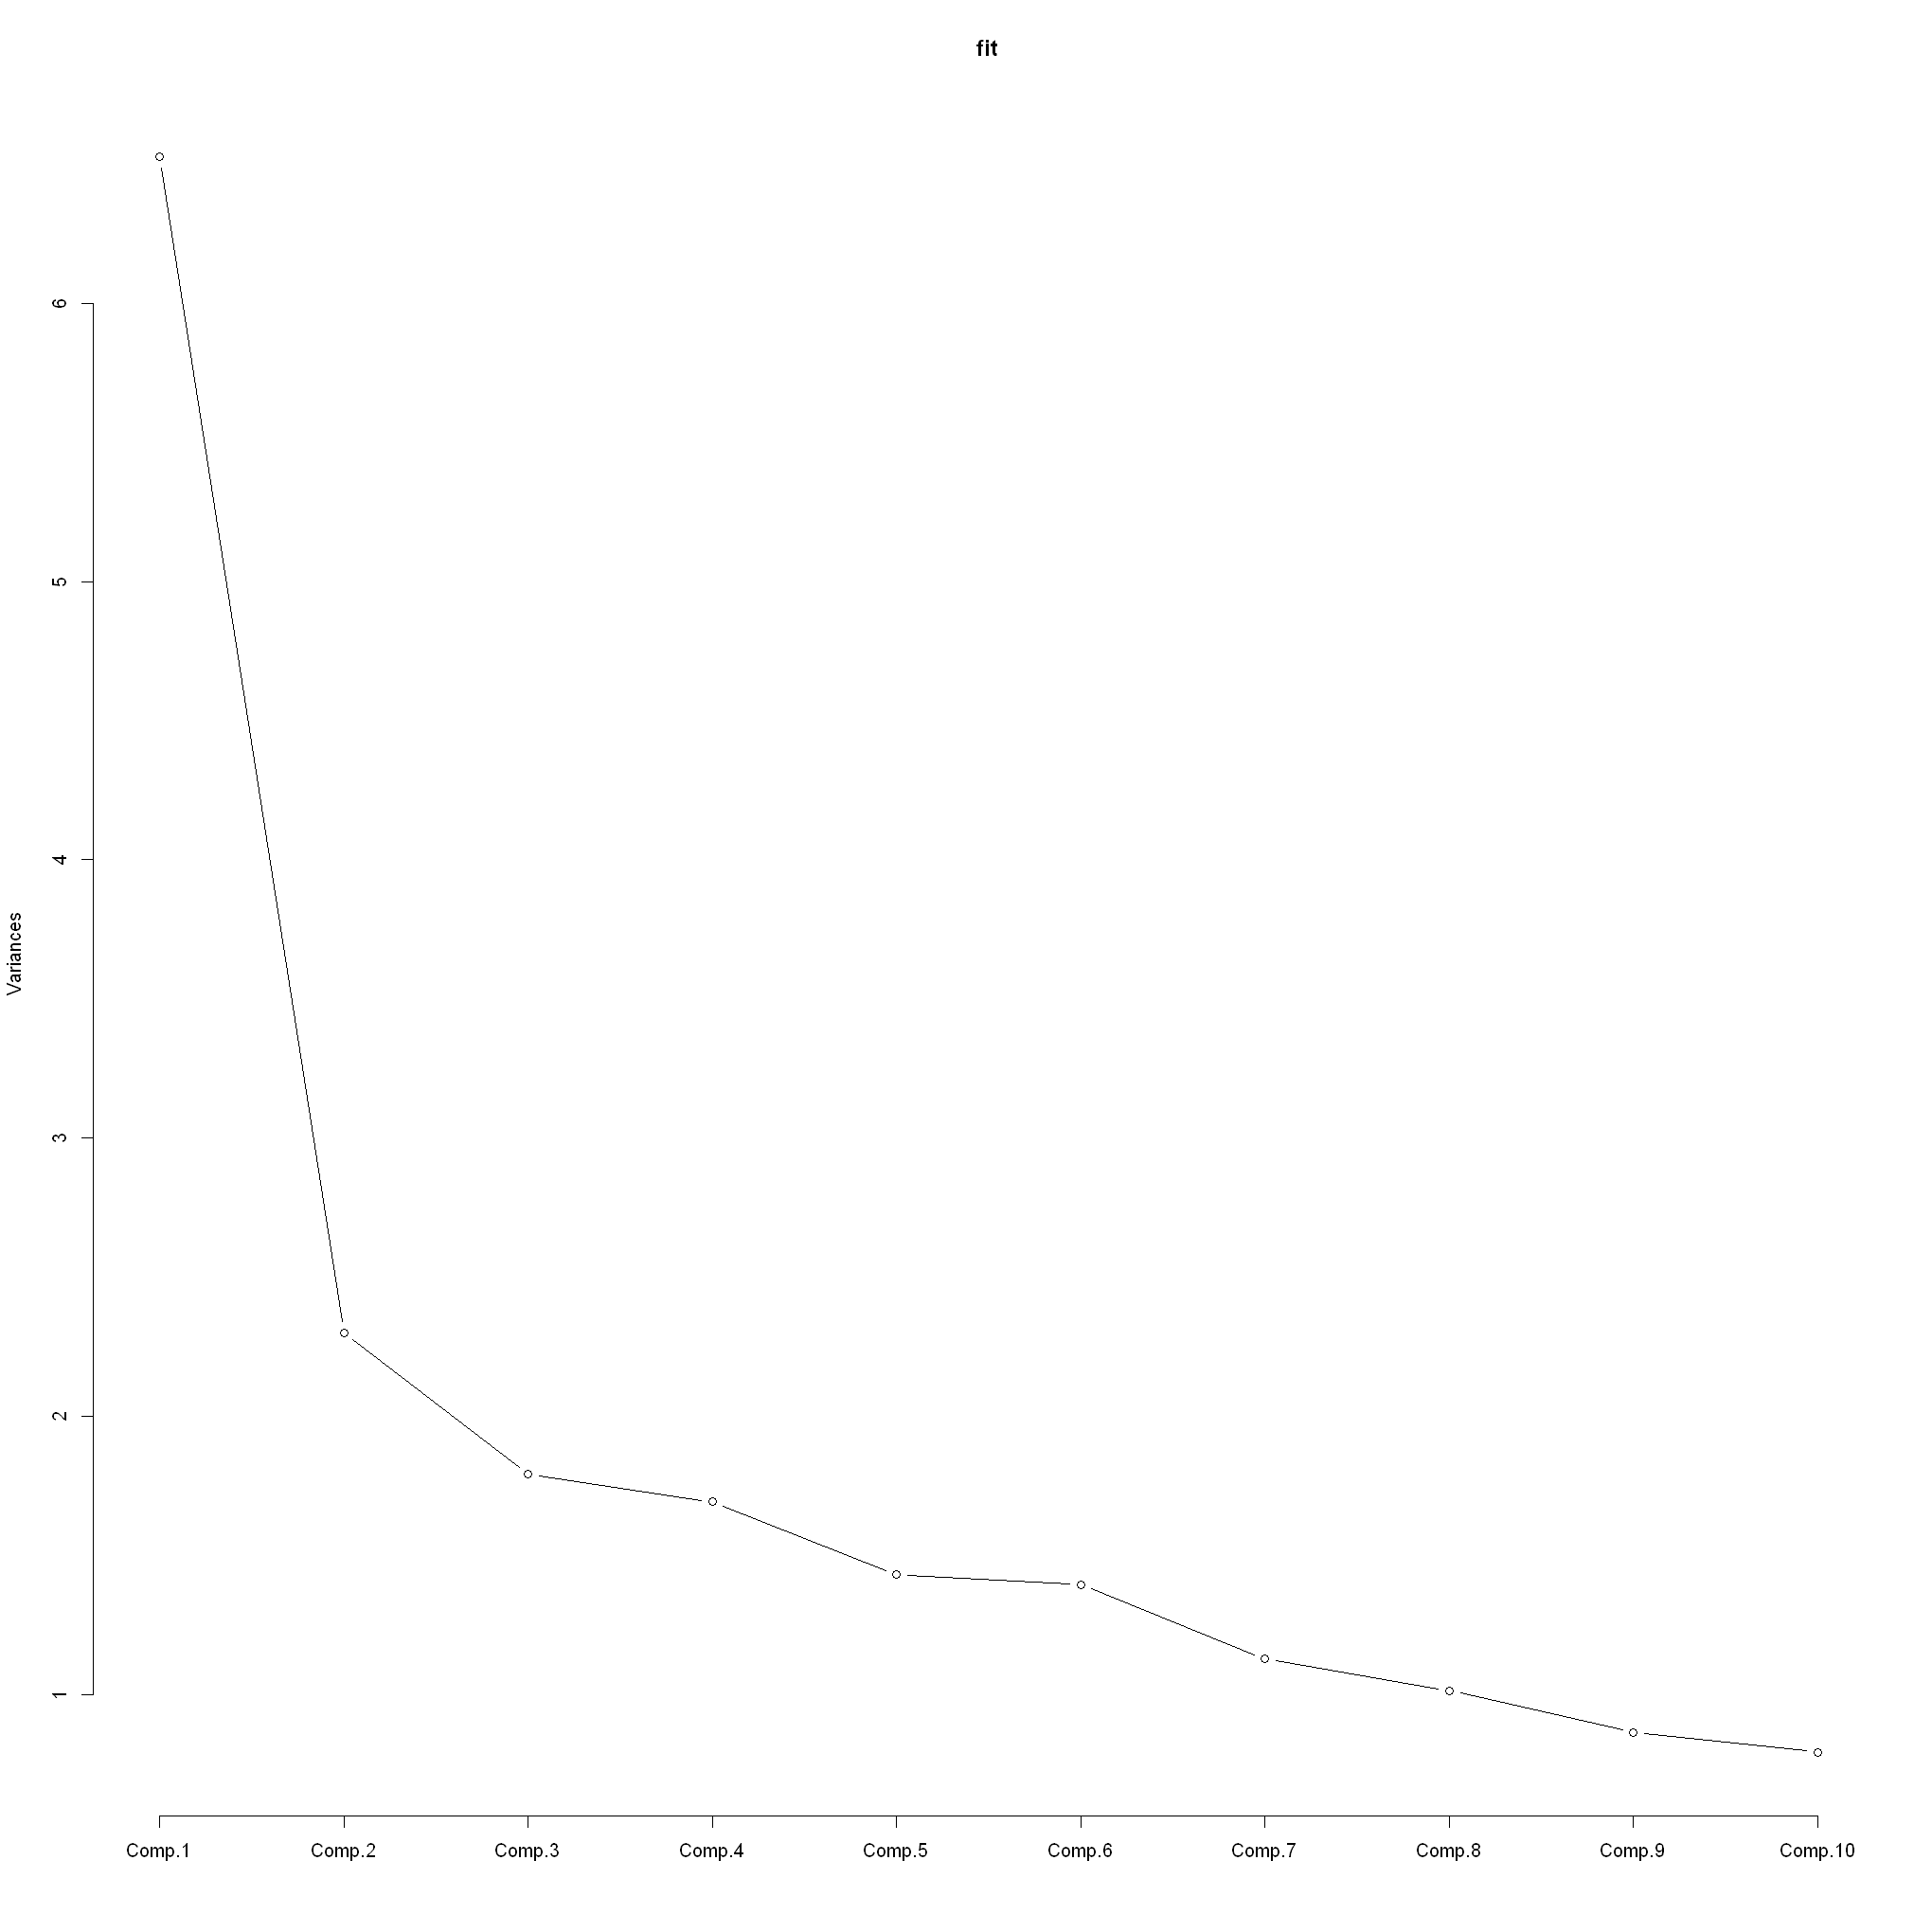

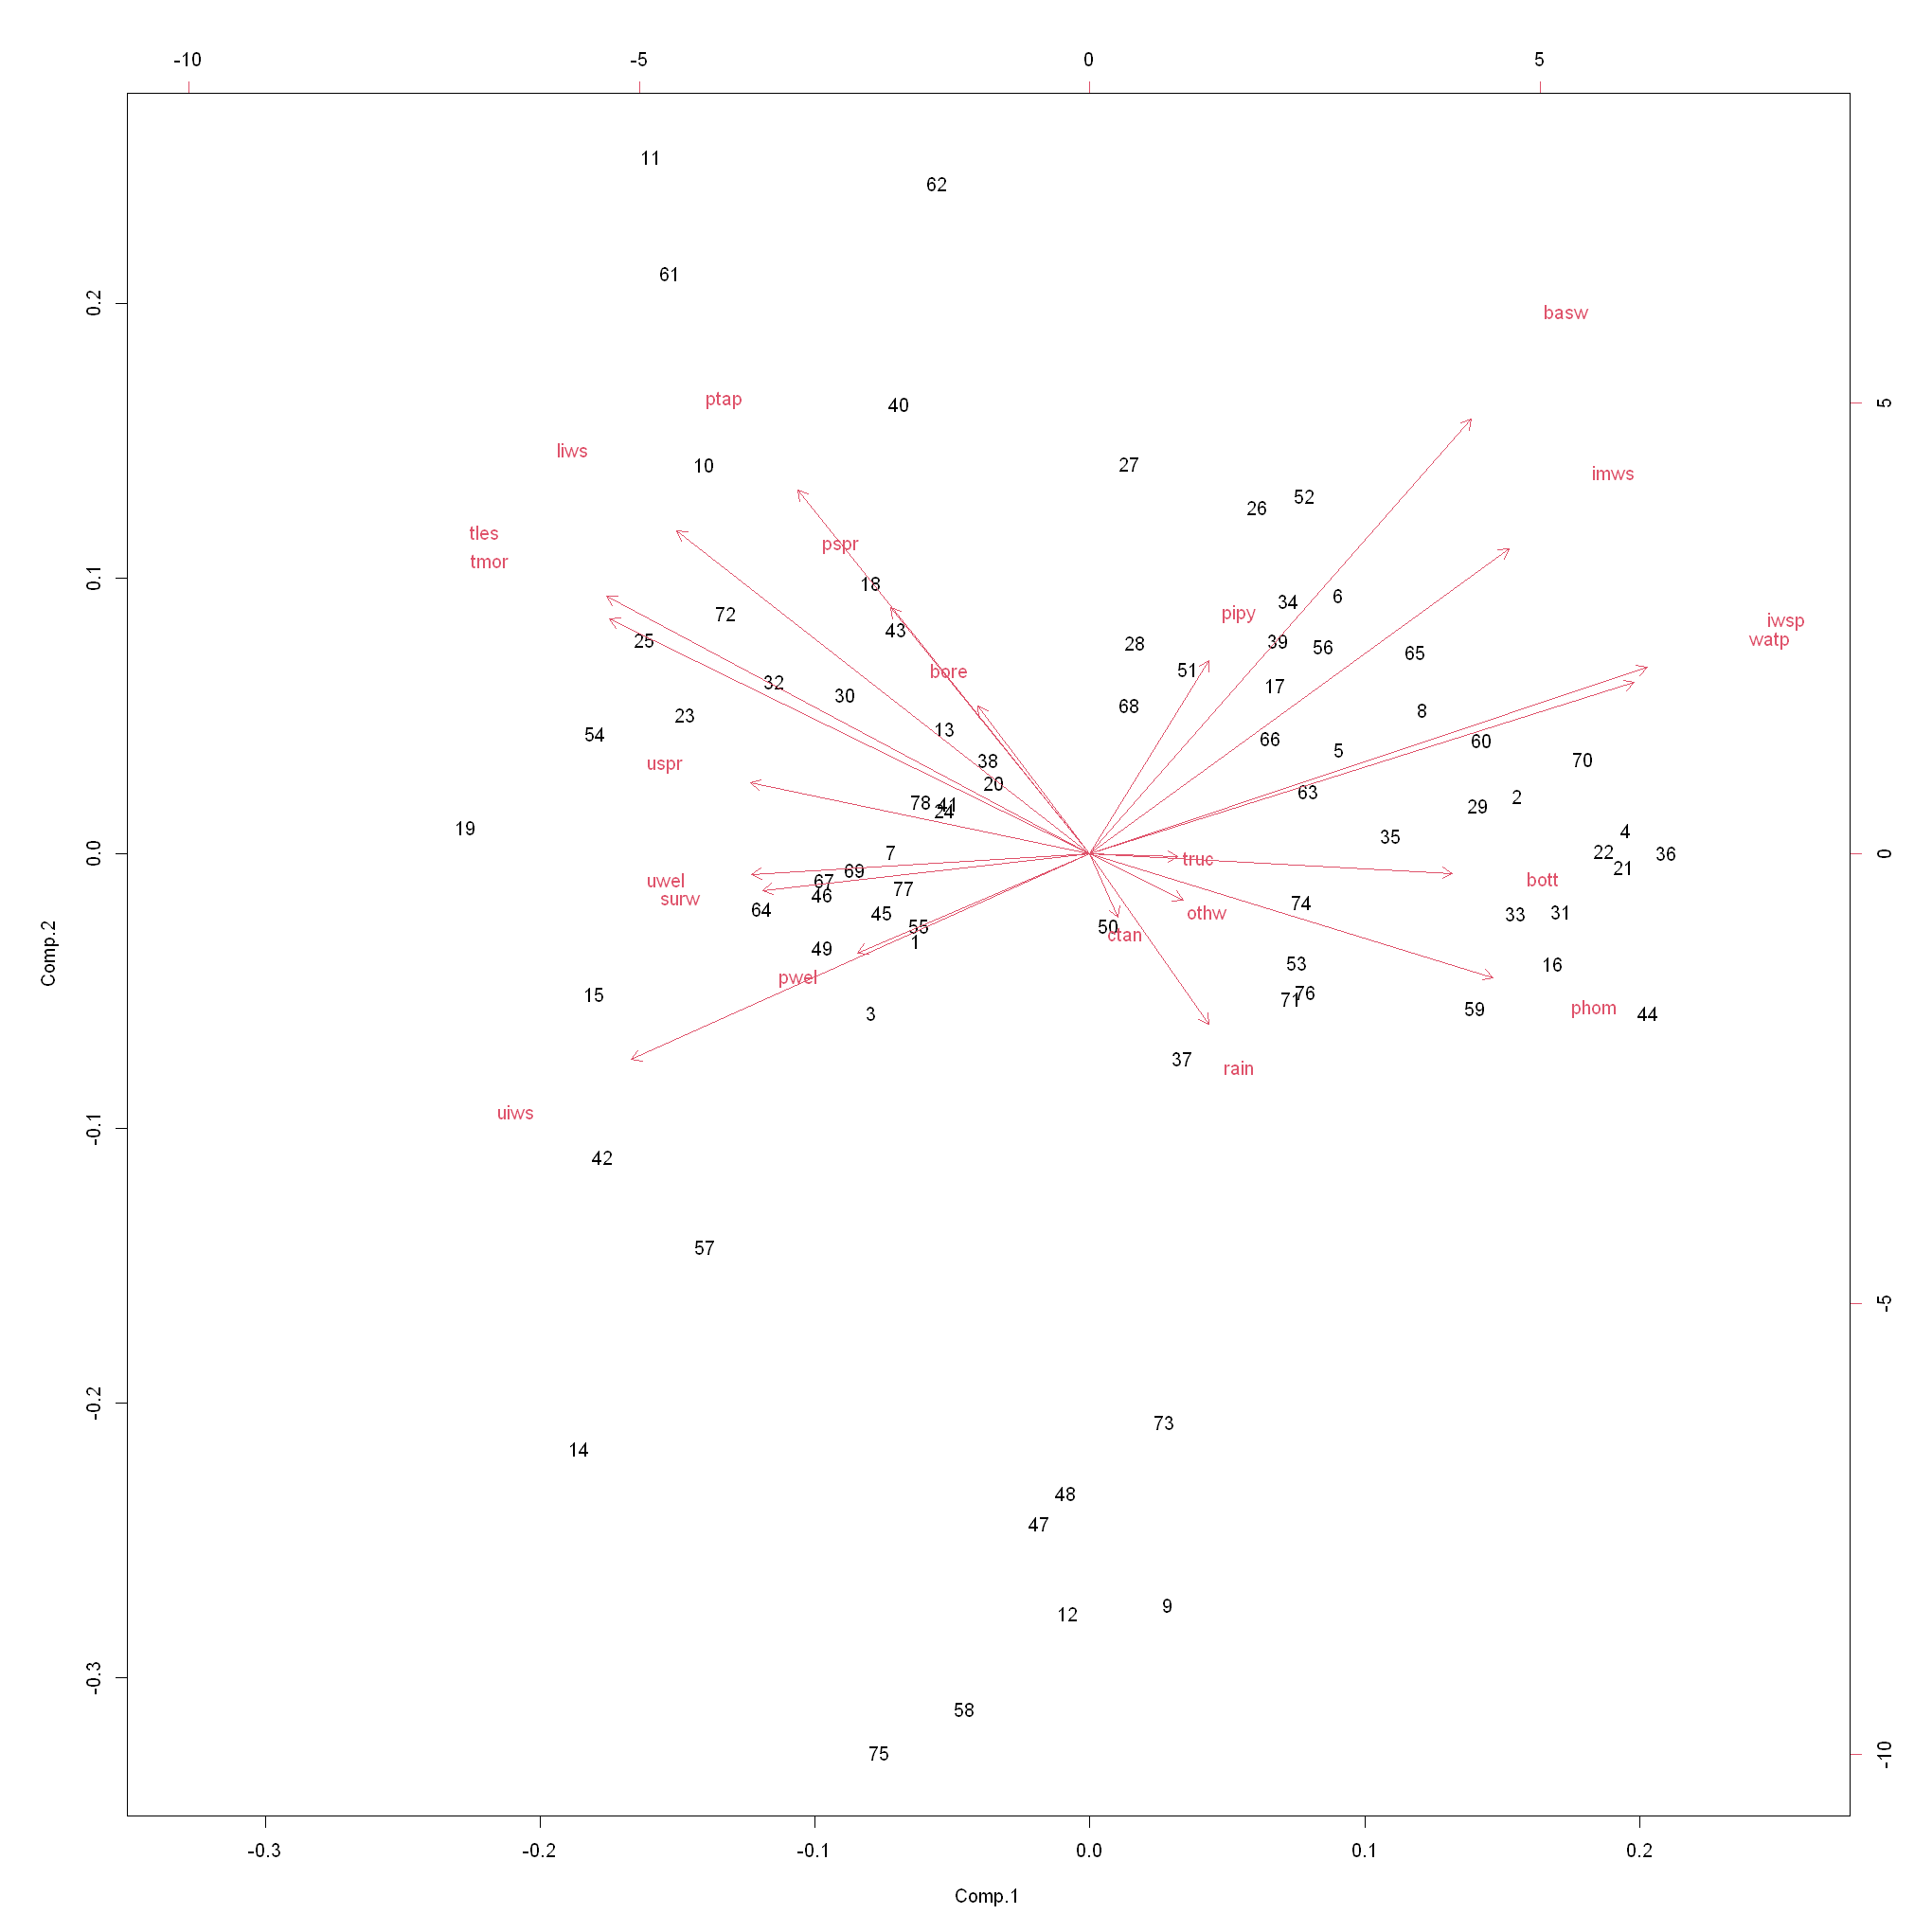

In [153]:
fit <- princomp(df.wa[,c(2:23)], cor=TRUE)
summary(fit) # print variance accounted for
loadings(fit) # pc loadings
plot(fit,type="lines") # scree plot
fit$scores # the principal components
biplot(fit )

In [154]:
# Varimax Rotated Principal Components
# retaining 7 components
fit <- principal(df.wa[,c(2:23)], nfactors=7, rotate="varimax")
fit # print results

Principal Components Analysis
Call: principal(r = df.wa[, c(2:23)], nfactors = 7, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
       RC1   RC5   RC2   RC4   RC3   RC6   RC7   h2    u2 com
imws  0.53 -0.71  0.00 -0.03 -0.08  0.10  0.12 0.81 0.188 2.0
phom  0.18 -0.44 -0.32  0.01  0.47 -0.25 -0.38 0.75 0.251 4.7
pipy  0.20 -0.02 -0.14 -0.03  0.23  0.81 -0.06 0.77 0.232 1.4
ptap -0.11  0.04  0.42  0.39 -0.01  0.67 -0.01 0.78 0.219 2.5
bore  0.06 -0.03 -0.11  0.30 -0.80 -0.12  0.09 0.77 0.228 1.4
pwel -0.46 -0.13 -0.01  0.22 -0.11 -0.09  0.57 0.62 0.380 2.5
pspr -0.02  0.01  0.84 -0.15  0.02  0.01 -0.11 0.75 0.251 1.1
rain -0.02  0.01 -0.03 -0.61 -0.02 -0.03  0.10 0.39 0.612 1.1
uiws -0.41  0.81  0.08  0.14  0.07 -0.04 -0.01 0.85 0.151 1.6
uwel -0.32  0.24 -0.09  0.50 -0.20  0.01  0.36 0.59 0.414 3.6
uspr -0.11  0.50  0.62 -0.15 -0.04 -0.05 -0.06 0.68 0.321 2.2
truc  0.25  0.05  0.00  0.38  0.53 -0.37  0.14 0.65 0.346 3.4
ctan  0.13  0.13 -0.01 

sources: https://www.statmethods.net/advstats/factor.html

# Factor Analysis

sources: http://www.di.fc.ul.pt/~jpn/r/factoranalysis/factoranalysis.html

Factor analysis is a statistical method used to describe variability among observed, correlated variables in terms of a potentially lower number of unobserved variables called factors. […] Factor analysis searches for such joint variations in response to unobserved latent(*) variables.

test of 3 factors

In [194]:
df.wa <- df.wa[,c(2:23)]

In [158]:
n.factors <- 3 

fit.three <- factanal(df.wa, 
                n.factors,                # number of factors to extract
                scores=c("regression"),
                rotation="none")

print(fit.three, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = df.wa, factors = n.factors, scores = c("regression"),     rotation = "none")

Uniquenesses:
imws phom pipy ptap bore pwel pspr rain uiws uwel uspr truc ctan bott othw surw 
0.61 0.58 0.94 0.63 0.88 0.84 0.82 0.92 0.61 0.76 0.79 0.91 0.99 0.70 0.98 0.71 
tles tmor watp iwsp basw liws 
0.00 0.12 0.02 0.00 0.07 0.00 

Loadings:
     Factor1 Factor2 Factor3
phom -0.61                  
ptap  0.53                  
uiws  0.55                  
bott -0.52                  
tles  0.81            0.53  
tmor  0.79    0.40   -0.31  
watp -0.85    0.50          
iwsp -0.86    0.51          
liws  0.77    0.48   -0.42  
basw -0.49    0.76    0.33  
imws -0.48    0.40          
pipy                        
bore                        
pwel  0.34                  
pspr  0.35                  
rain                        
uwel  0.48                  
uspr  0.44                  
truc                        
ctan                        
othw                        
surw  0.38     

test of 2 factors

In [159]:
n.factors <- 2 

fit.two <- factanal(df.wa, 
                n.factors,                # number of factors to extract
                scores=c("regression"),
                rotation="none")

print(fit.two, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = df.wa, factors = n.factors, scores = c("regression"),     rotation = "none")

Uniquenesses:
imws phom pipy ptap bore pwel pspr rain uiws uwel uspr truc ctan bott othw surw 
0.64 0.58 0.94 0.67 0.87 0.84 0.91 0.92 0.64 0.78 0.79 0.95 1.00 0.70 0.98 0.76 
tles tmor watp iwsp basw liws 
0.02 0.59 0.02 0.00 0.07 0.66 

Loadings:
     Factor1 Factor2
imws  0.60          
uiws -0.58          
bott  0.53          
tmor -0.53    0.36  
watp  0.99          
iwsp  1.00          
basw  0.81    0.53  
tles -0.57    0.81  
phom  0.49   -0.42  
pipy                
ptap -0.33    0.47  
bore          0.32  
pwel -0.40          
pspr                
rain                
uwel -0.40          
uspr -0.35          
truc                
ctan                
othw                
surw -0.34    0.36  
liws -0.47    0.35  

               Factor1 Factor2
SS loadings       5.52    2.15
Proportion Var    0.25    0.10
Cumulative Var    0.25    0.35

Test of the hypothesis that 2 factors are su

In [160]:
head(fit.two$scores , 7)

Factor1,Factor2
-0.3029924,0.46436072
1.0587995,0.04718405
-0.4562825,0.37834251
1.7438380,-0.49415535
0.8878400,-0.11890773
0.9741409,0.21976321
-0.5091942,0.57328022


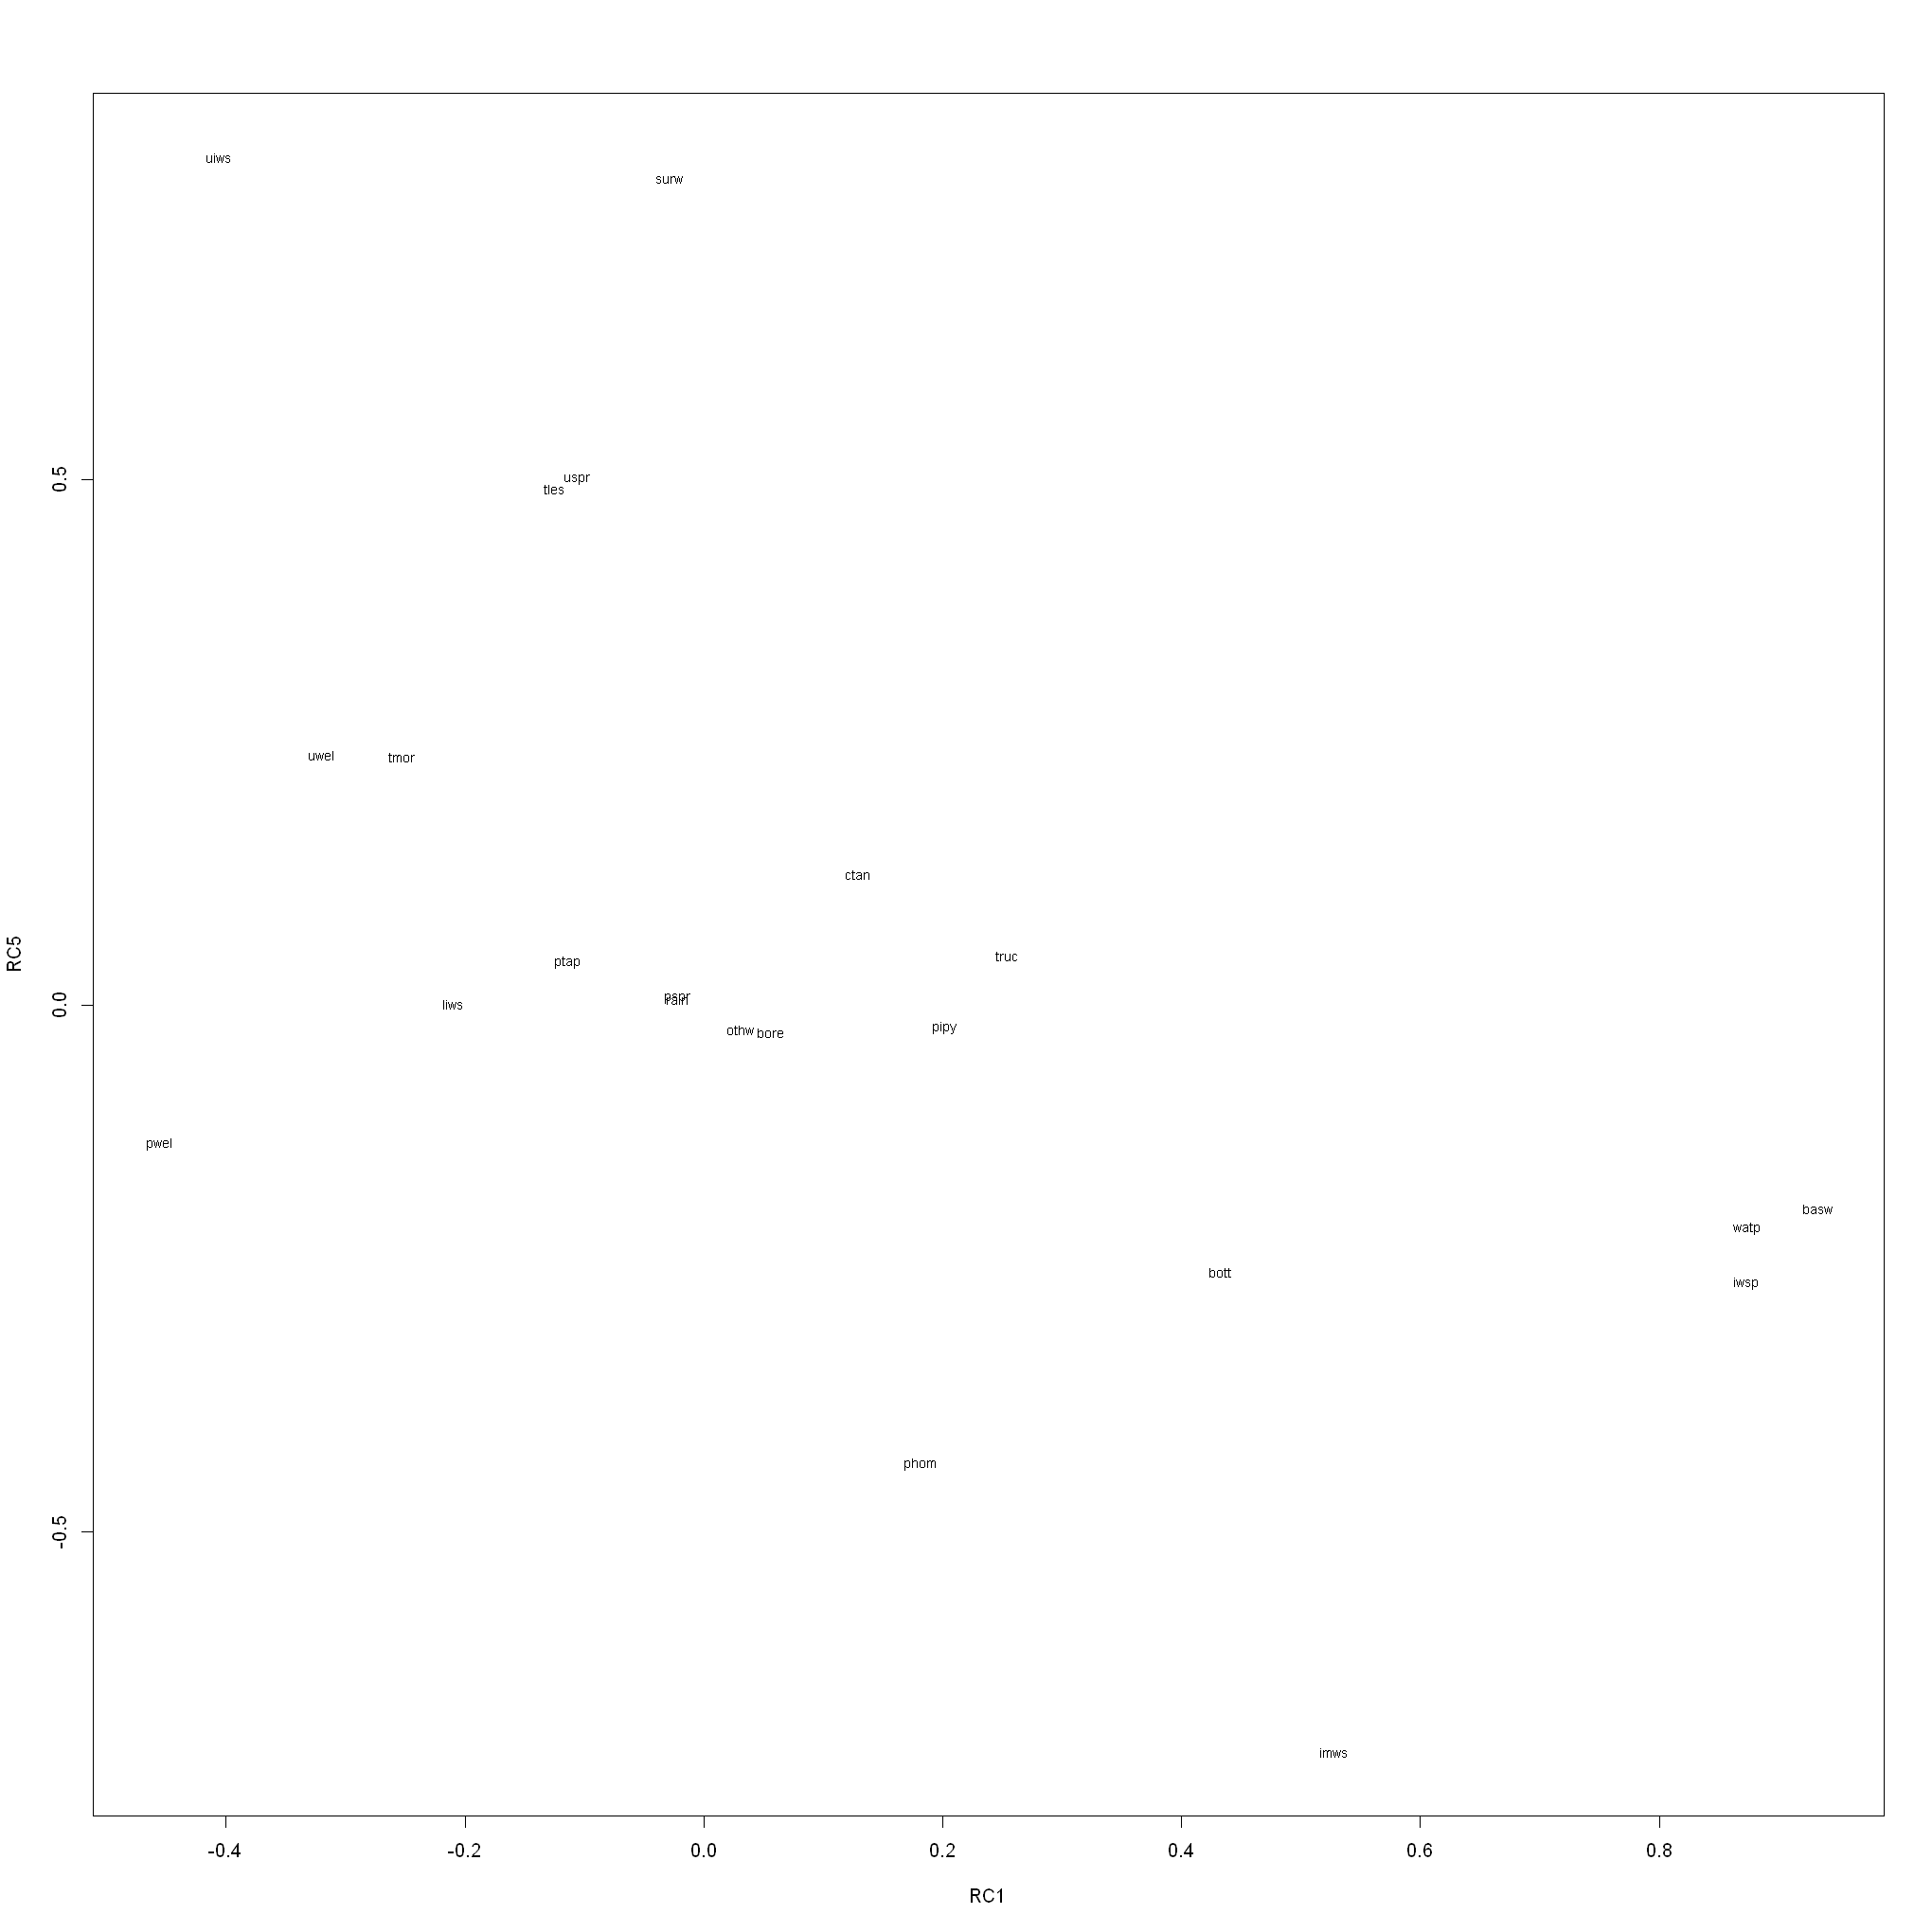

In [161]:
# plot factor 1 by factor 2 
load <- fit$loadings[,1:2] 
plot(load,type="n") # set up plot 
text(load,labels=names(df.wa),cex=.7) # add variable names

The output maximizes variance for the 1st and subsequent factors, while all are orthogonal to each other.

Rotation serves to make the output more understandable, by seeking so-called “Simple Structure”: A pattern of loadings where items load most strongly on one factor, and much more weakly on the other factors. Eg, varimax rotation is an orthogonal rotation of the factor axes to maximize the variance of the squared loadings of a factor (column) on all the variables (rows) in a factor matrix, which has the effect of differentiating the original variables by extracted factor. 

In [162]:
fit <- factanal(df.wa, 
                n.factors,              # number of factors to extract
                rotation="varimax")     # 'varimax' is an ortho rotation

load <- fit$loadings[,1:2] 
head(load , 7)

,Factor1,Factor2
imws,0.564793699,-0.20867995
phom,0.278491520,-0.58205528
pipy,0.240400710,-0.04726435
ptap,-0.111156637,0.56537591
bore,-0.002135725,0.35694094
pwel,-0.375901347,0.13311373
pspr,-0.109429268,0.28220100


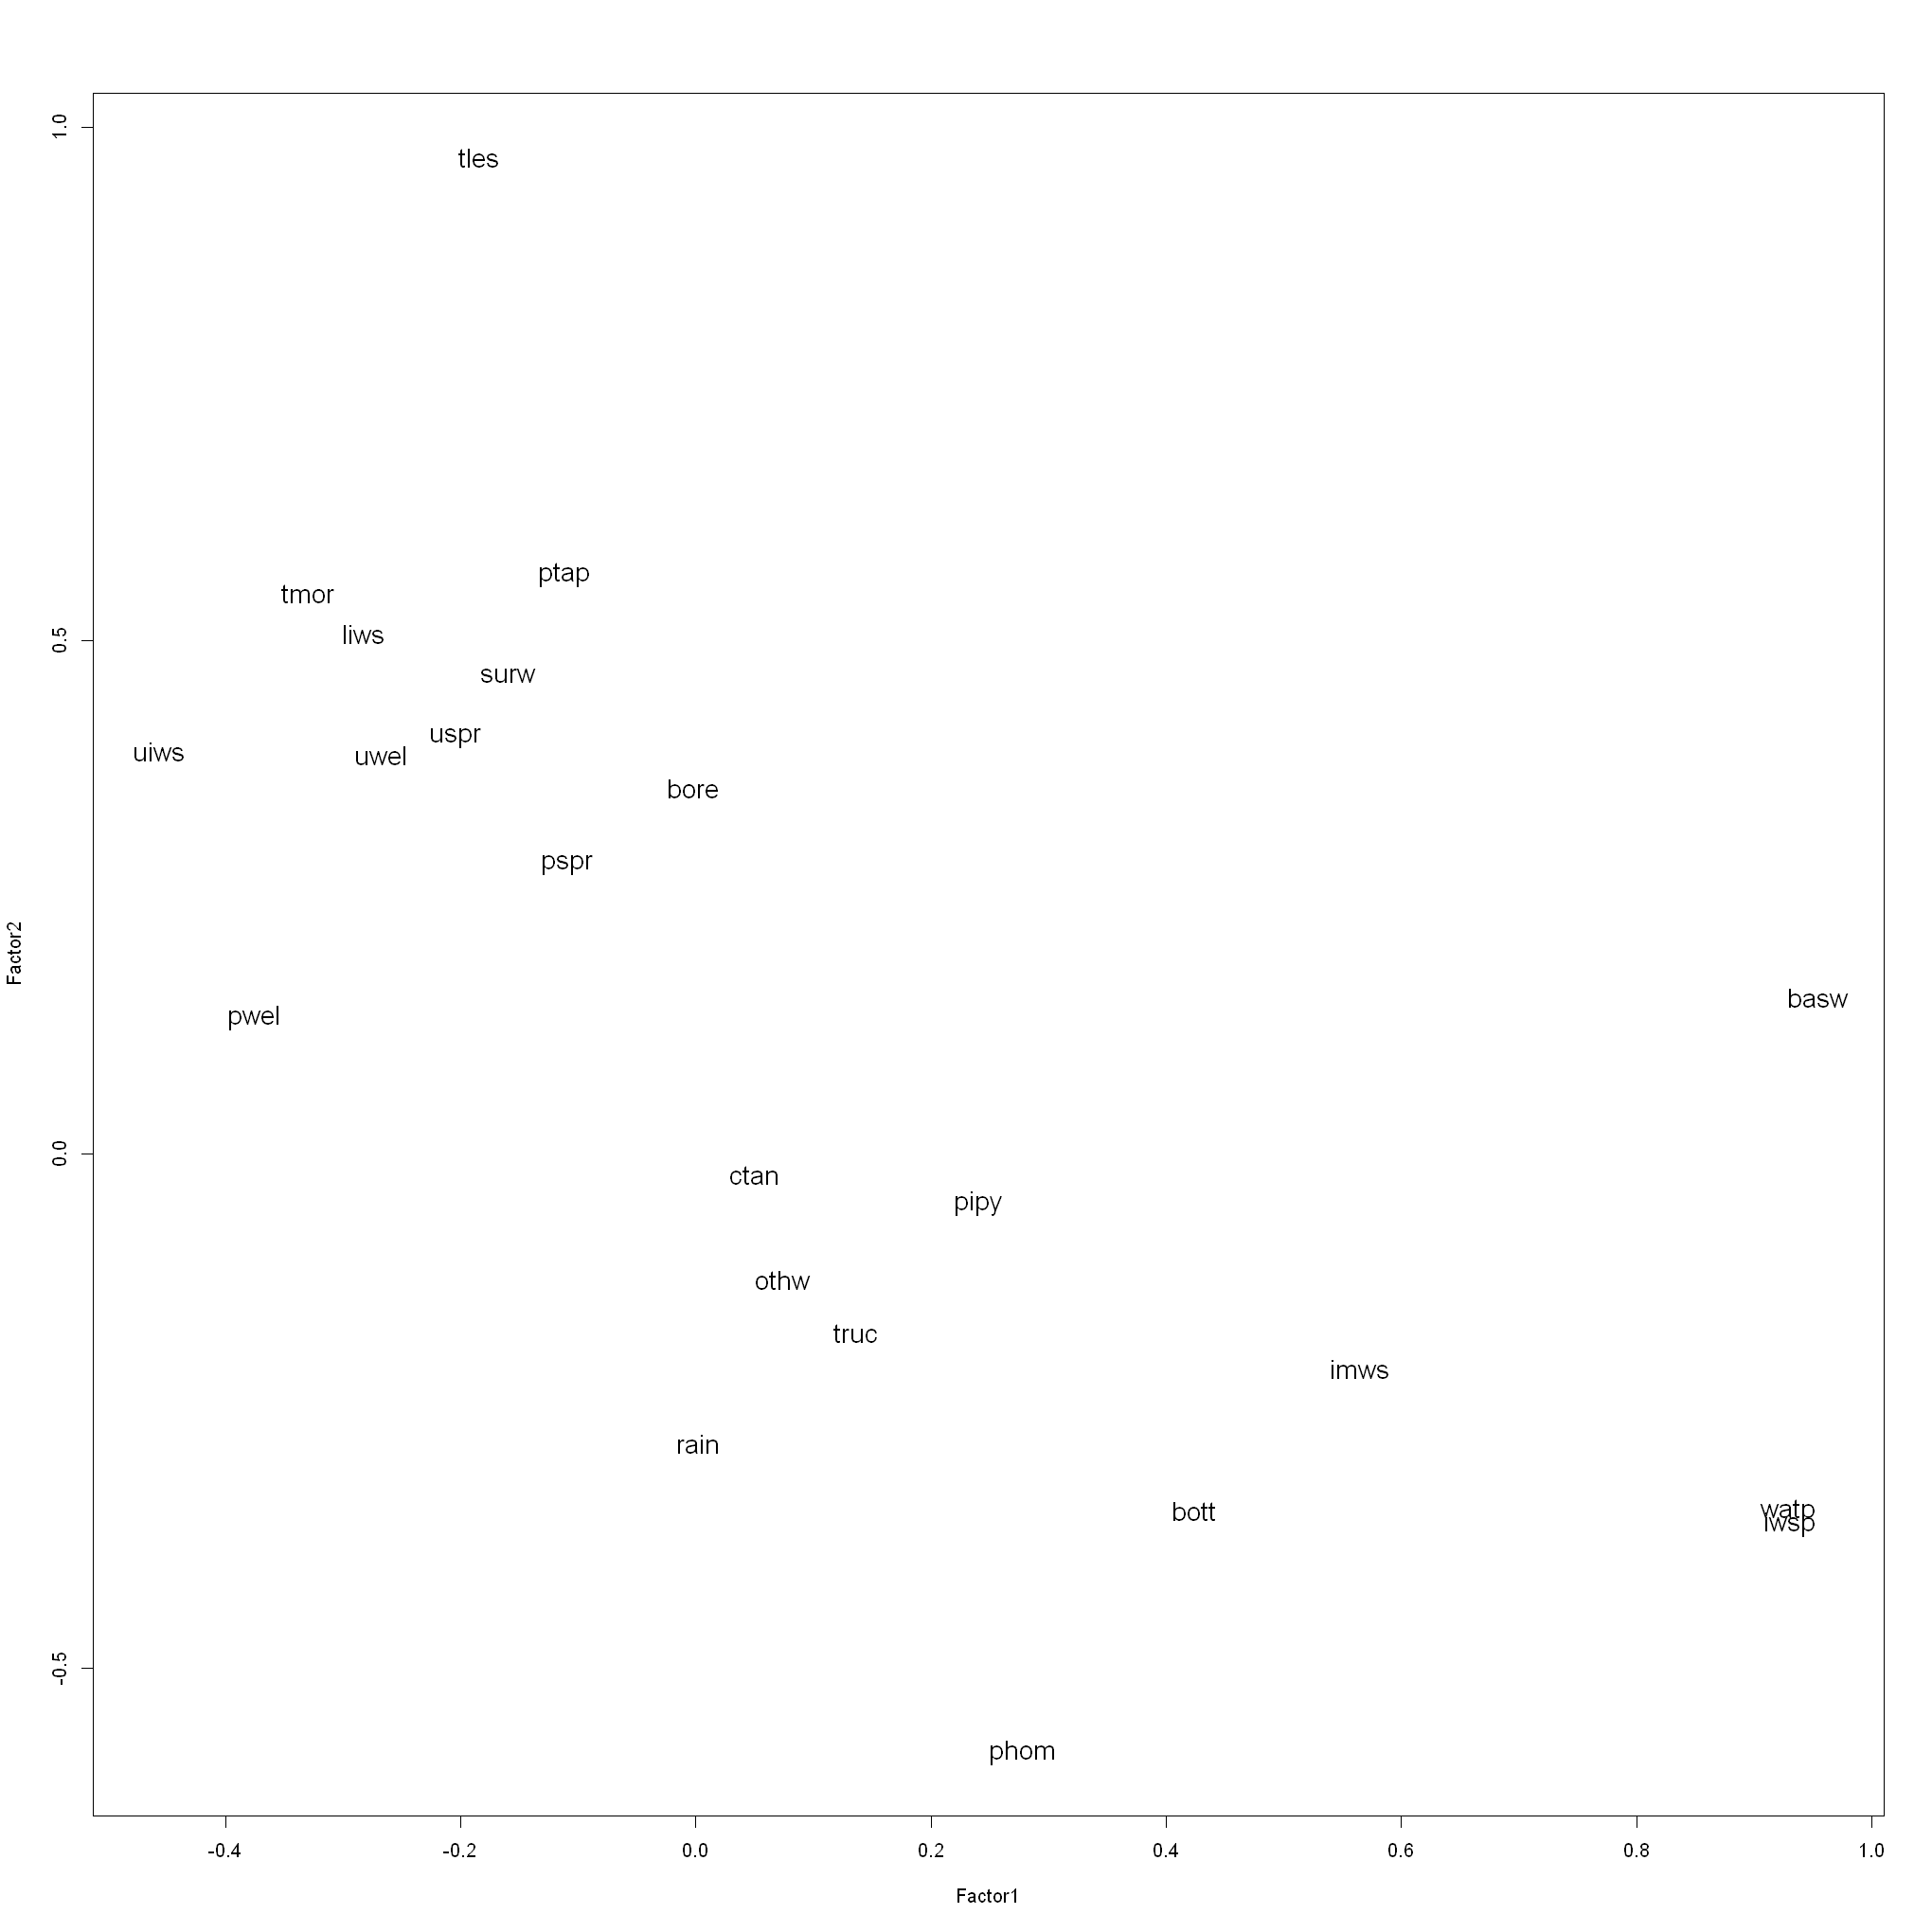

In [163]:
plot(load,type="n") # set up plot 
text(load,labels=names(df.wa),cex=1.4) # add variable names

Looking at both plots we see that iwsp, watp all have high factor loadings around 0.9 on the first factor (PA1) while tles, tmor, uiws load highly on the second factor (PA2). We could rename PA1 as prem, and PA2 as dist.

In [186]:
solution <- fa(r = cor(df.wa, nfactors = 4, rotate = "oblimin", fm = "pa")

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."


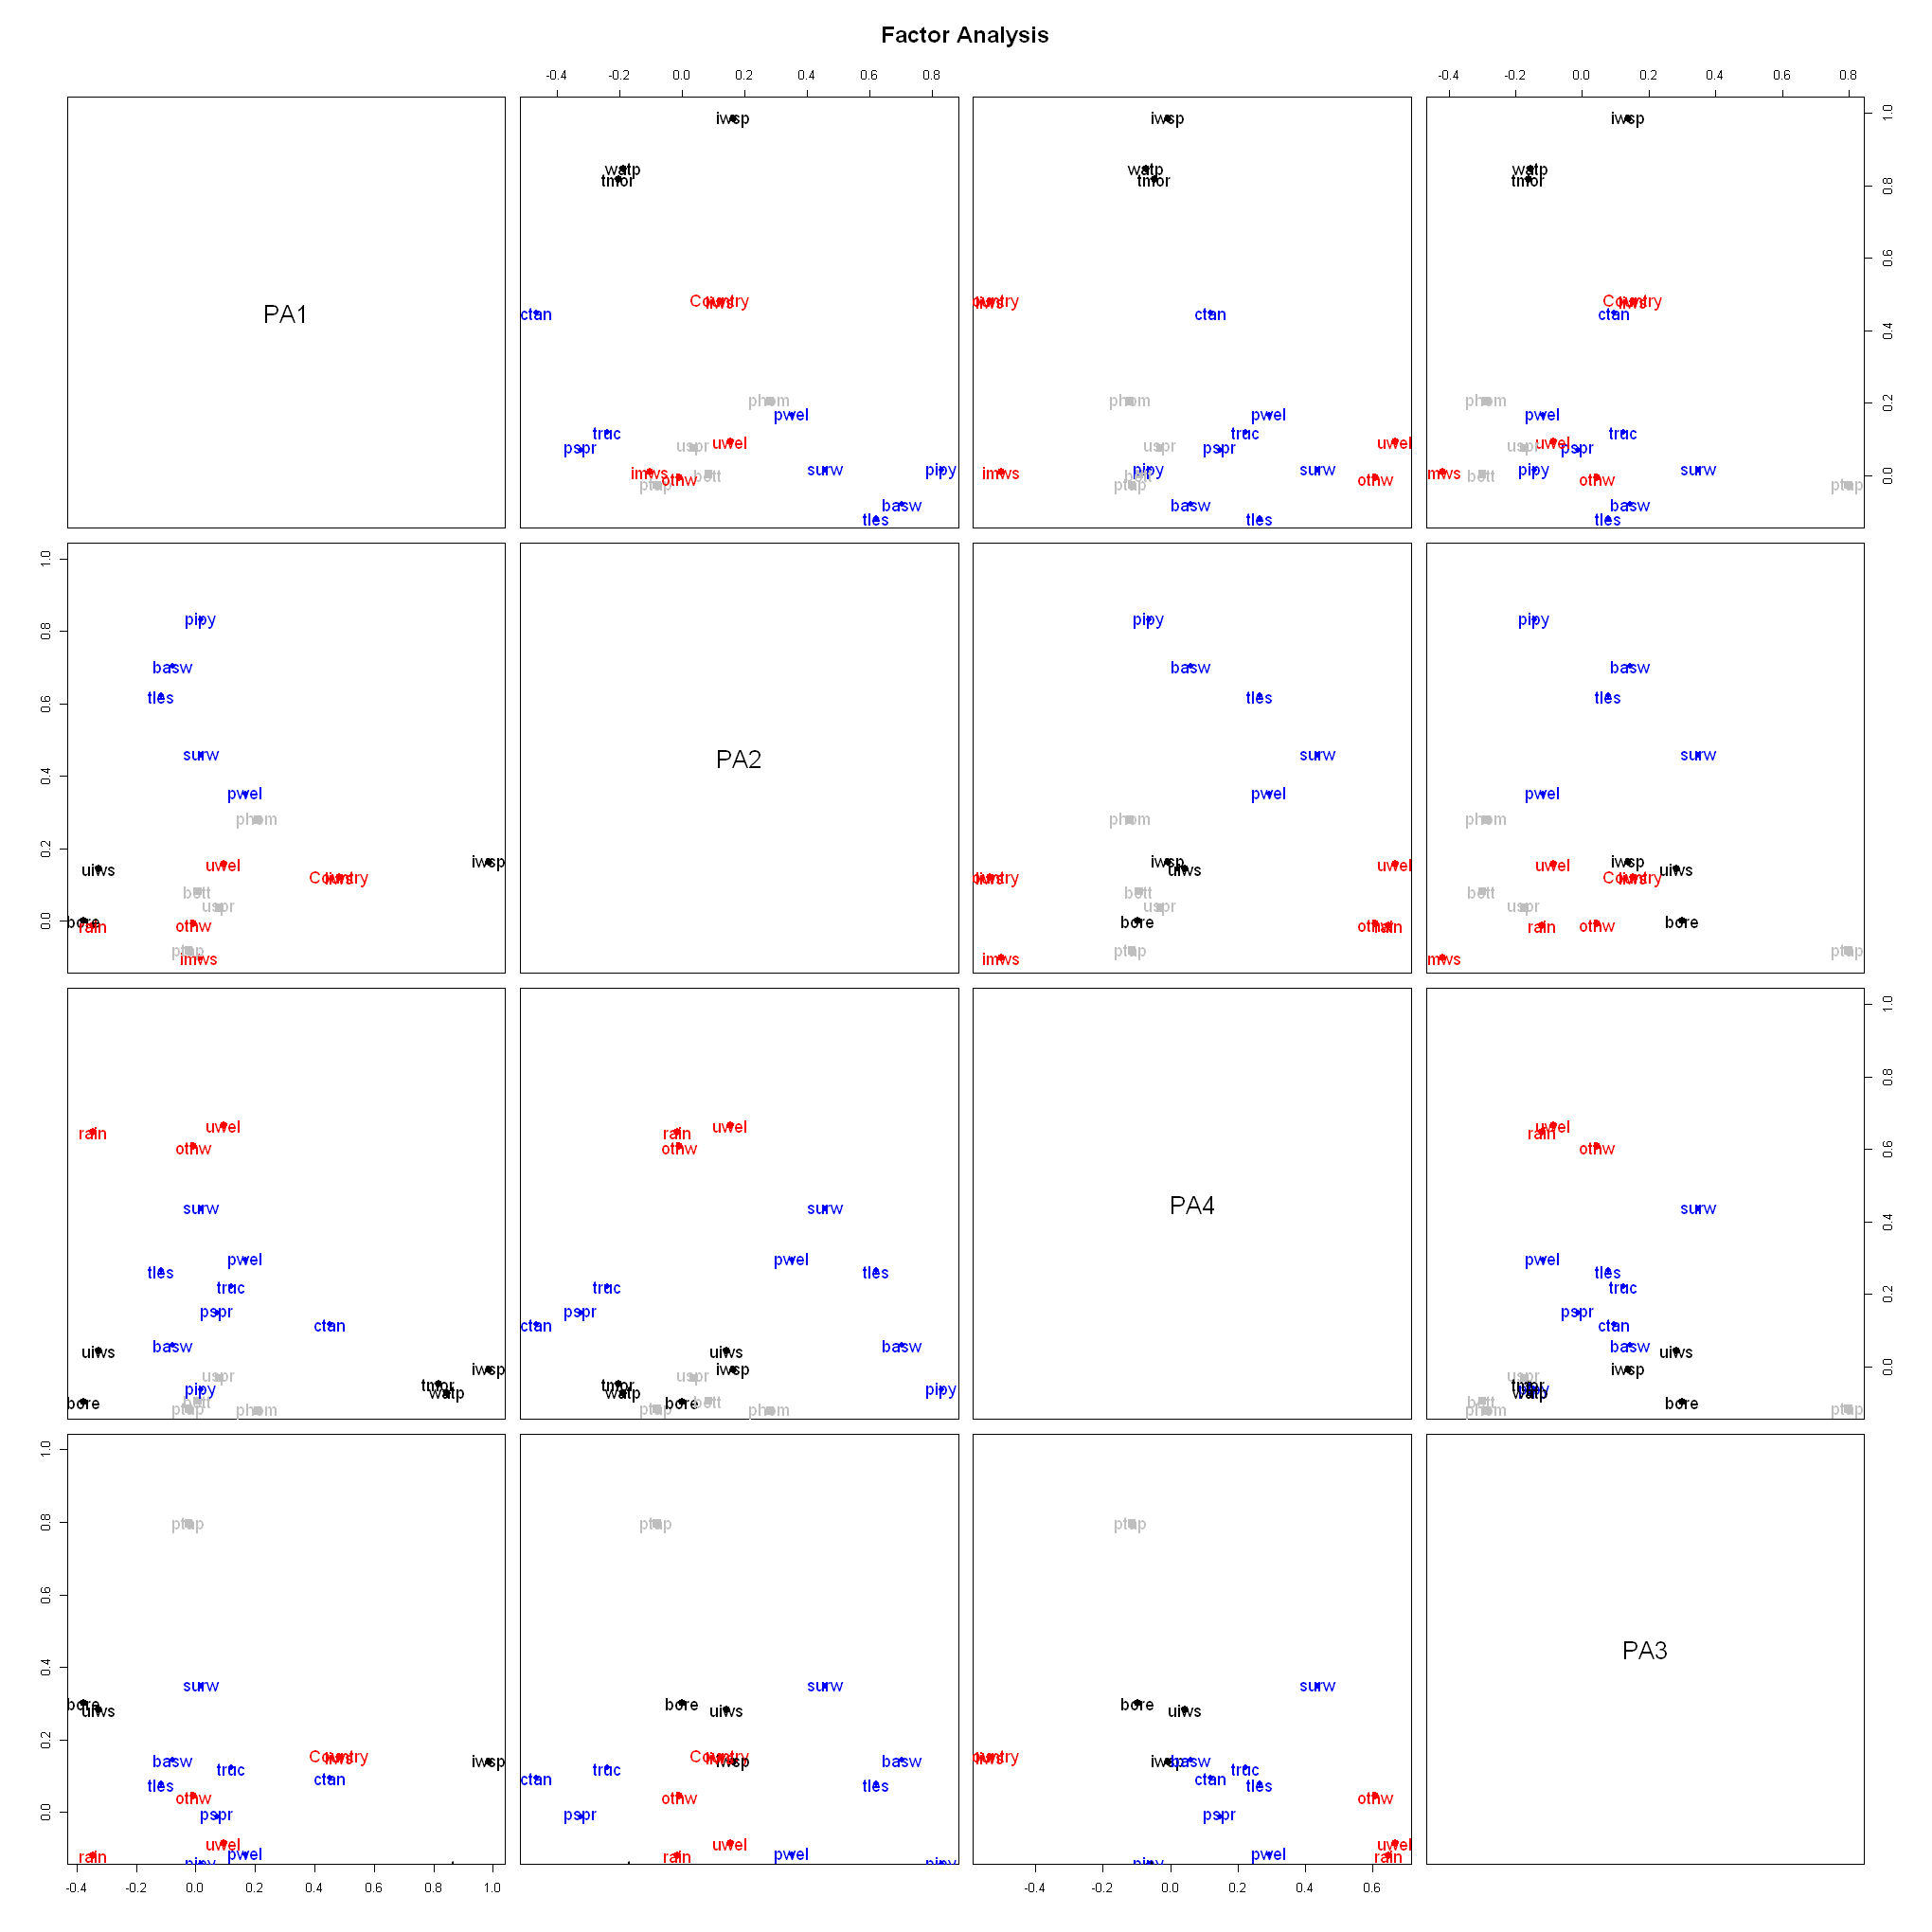

In [187]:
plot(solution,labels=names(df.wa),cex=1.4, ylim=c(-.1,1)) 

In [188]:
solution

Factor Analysis using method =  pa
Call: fa(r = cor(df.wa[, (2:23)]), nfactors = 4, rotate = "oblimin", 
    fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
       PA1   PA2   PA4   PA3    h2    u2 com
imws  0.48  0.12 -0.54  0.15 0.688 0.312 2.3
phom  0.01 -0.10 -0.50 -0.42 0.560 0.440 2.0
pipy  0.21  0.28 -0.12 -0.29 0.162 0.838 3.2
ptap  0.02  0.83 -0.06 -0.14 0.609 0.391 1.1
bore -0.03 -0.08 -0.12  0.80 0.599 0.401 1.1
pwel -0.38  0.00 -0.10  0.30 0.221 0.779 2.1
pspr  0.17  0.35  0.29 -0.12 0.224 0.776 2.7
rain  0.07 -0.32  0.15 -0.01 0.103 0.897 1.5
uiws -0.34 -0.01  0.65 -0.12 0.711 0.289 1.6
uwel -0.33  0.14  0.04  0.28 0.289 0.711 2.4
uspr  0.09  0.16  0.67 -0.09 0.474 0.526 1.2
truc  0.08  0.04 -0.03 -0.17 0.038 0.962 1.6
ctan  0.12 -0.24  0.22  0.12 0.076 0.924 3.0
bott  0.45 -0.47  0.12  0.09 0.420 0.580 2.2
othw  0.00  0.08 -0.09 -0.30 0.094 0.906 1.4
surw -0.01 -0.01  0.61  0.04 0.379 0.621 1.0
tles  0.02  0.46  0.44  0.35 0.786 0.214 2.9
t

# Determining the Number of Factors to Extract

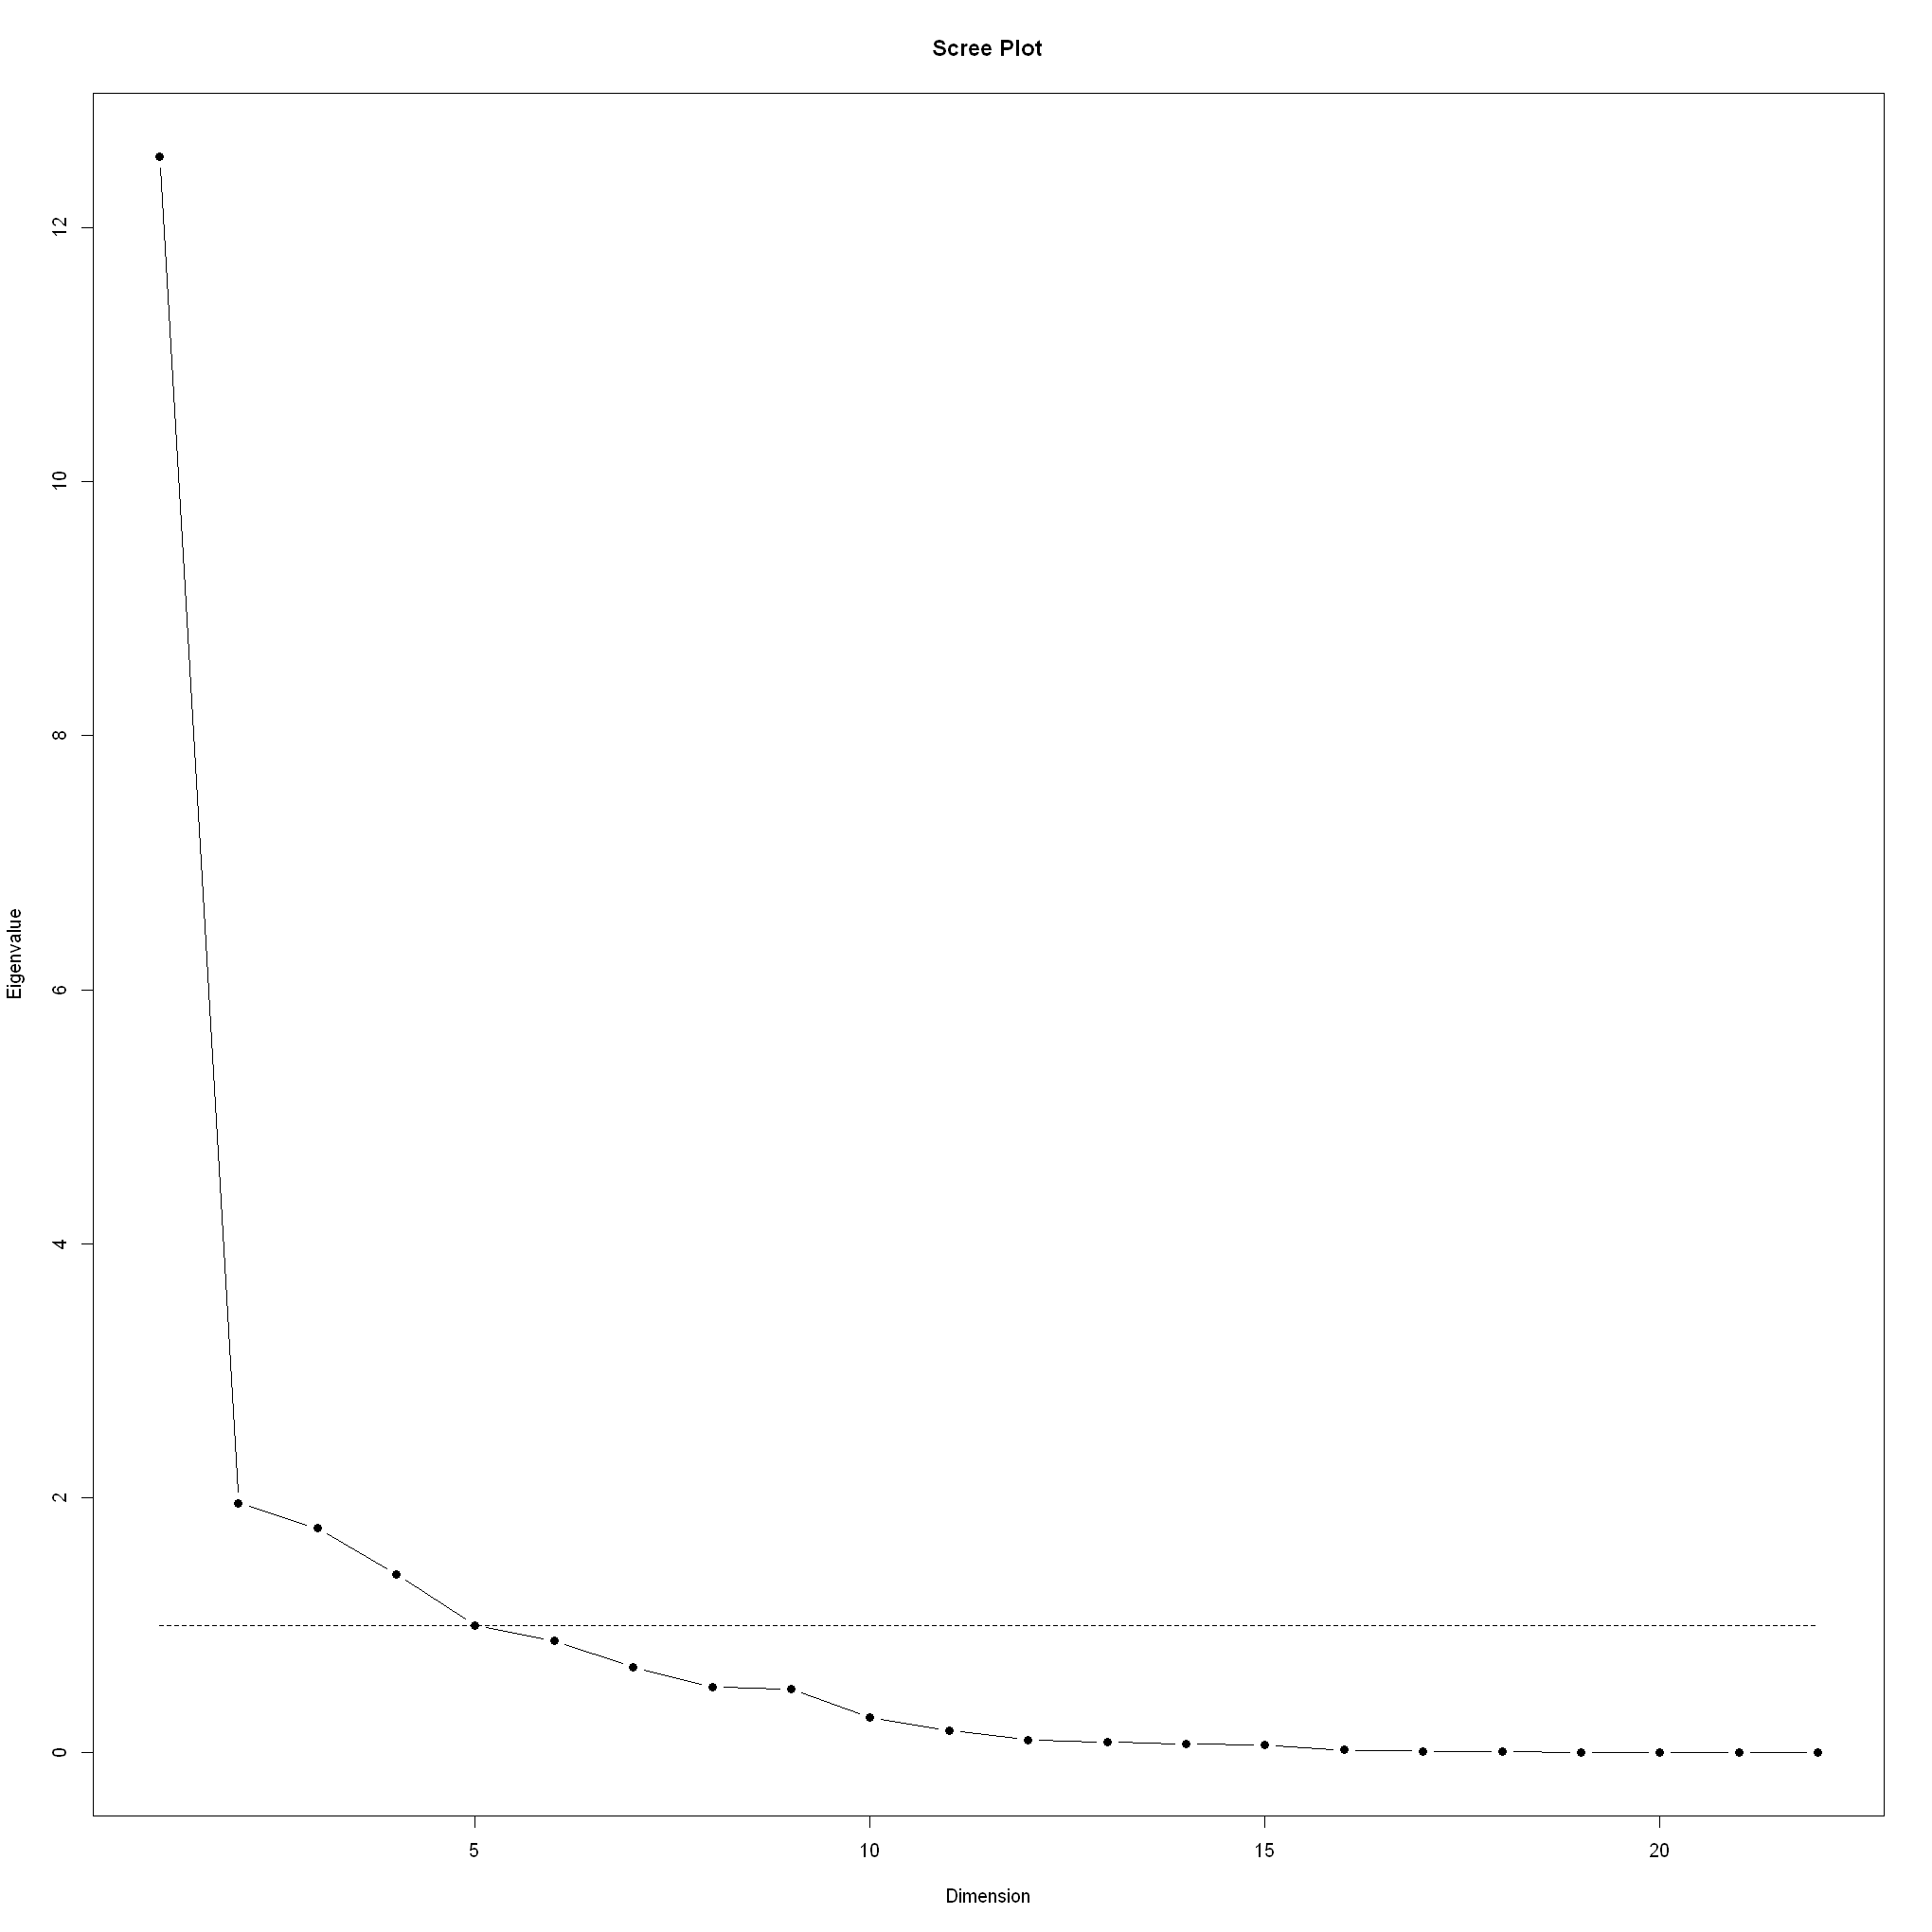

In [189]:
scree.plot(fit.two$correlation)

simple = five factors

In [190]:
ev <- eigen(cor(df.wa)) # get eigenvalues
ap <- parallel(subject=nrow(df.wa),var=ncol(df.wa), rep=100, cent=.05)
nS <- nScree(x=ev$values, aparallel=ap$eigen$qevpea)
plotnScree(nS)

ERROR: Error in cor(df.wa): 'x' must be numeric


In [191]:
head(df.wa ,7)

Country,imws,phom,pipy,ptap,bore,pwel,pspr,rain,uiws,...,ctan,bott,othw,surw,tles,tmor,watp,iwsp,basw,liws
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,71.2,2.3,4.8,14.2,20.1,18.5,4.7,0.4,28.7,...,4.4,0.2,1.7,7.3,45.2,8.2,45.3,35.4,65.3,5.0
Albania,98.4,48.8,5.2,2.4,1.4,4.1,2.5,0.0,1.6,...,0.2,19.6,0.1,0.0,20.6,1.1,77.9,77.0,97.0,0.9
Angola,66.9,4.3,9.7,10.3,1.9,9.1,3.3,1.7,33.1,...,4.3,1.2,1.8,18.0,46.1,15.6,34.5,32.6,57.0,7.5
Armenia,99.9,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.1,...,0.0,0.0,0.0,0.0,1.6,0.1,97.6,97.6,99.1,0.1
Azerbaijan,90.6,34.0,19.7,3.5,9.3,6.2,7.5,0.0,9.4,...,0.7,0.1,1.1,7.0,18.7,4.4,75.9,71.2,86.4,3.4
Bangladesh,97.8,4.3,3.3,2.7,86.4,0.2,0.0,0.4,2.2,...,0.1,0.3,0.1,1.2,22.7,1.6,75.5,75.1,96.4,1.3
Benin,71.7,5.1,4.2,13.0,28.9,4.4,0.3,0.4,28.3,...,0.3,0.0,0.4,5.8,49.8,12.1,37.4,29.6,64.0,7.3


In [195]:
solution.opt <- fa(r = cor(df.wa), nfactors = 4, rotate = "oblimin", fm = "pa")

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."


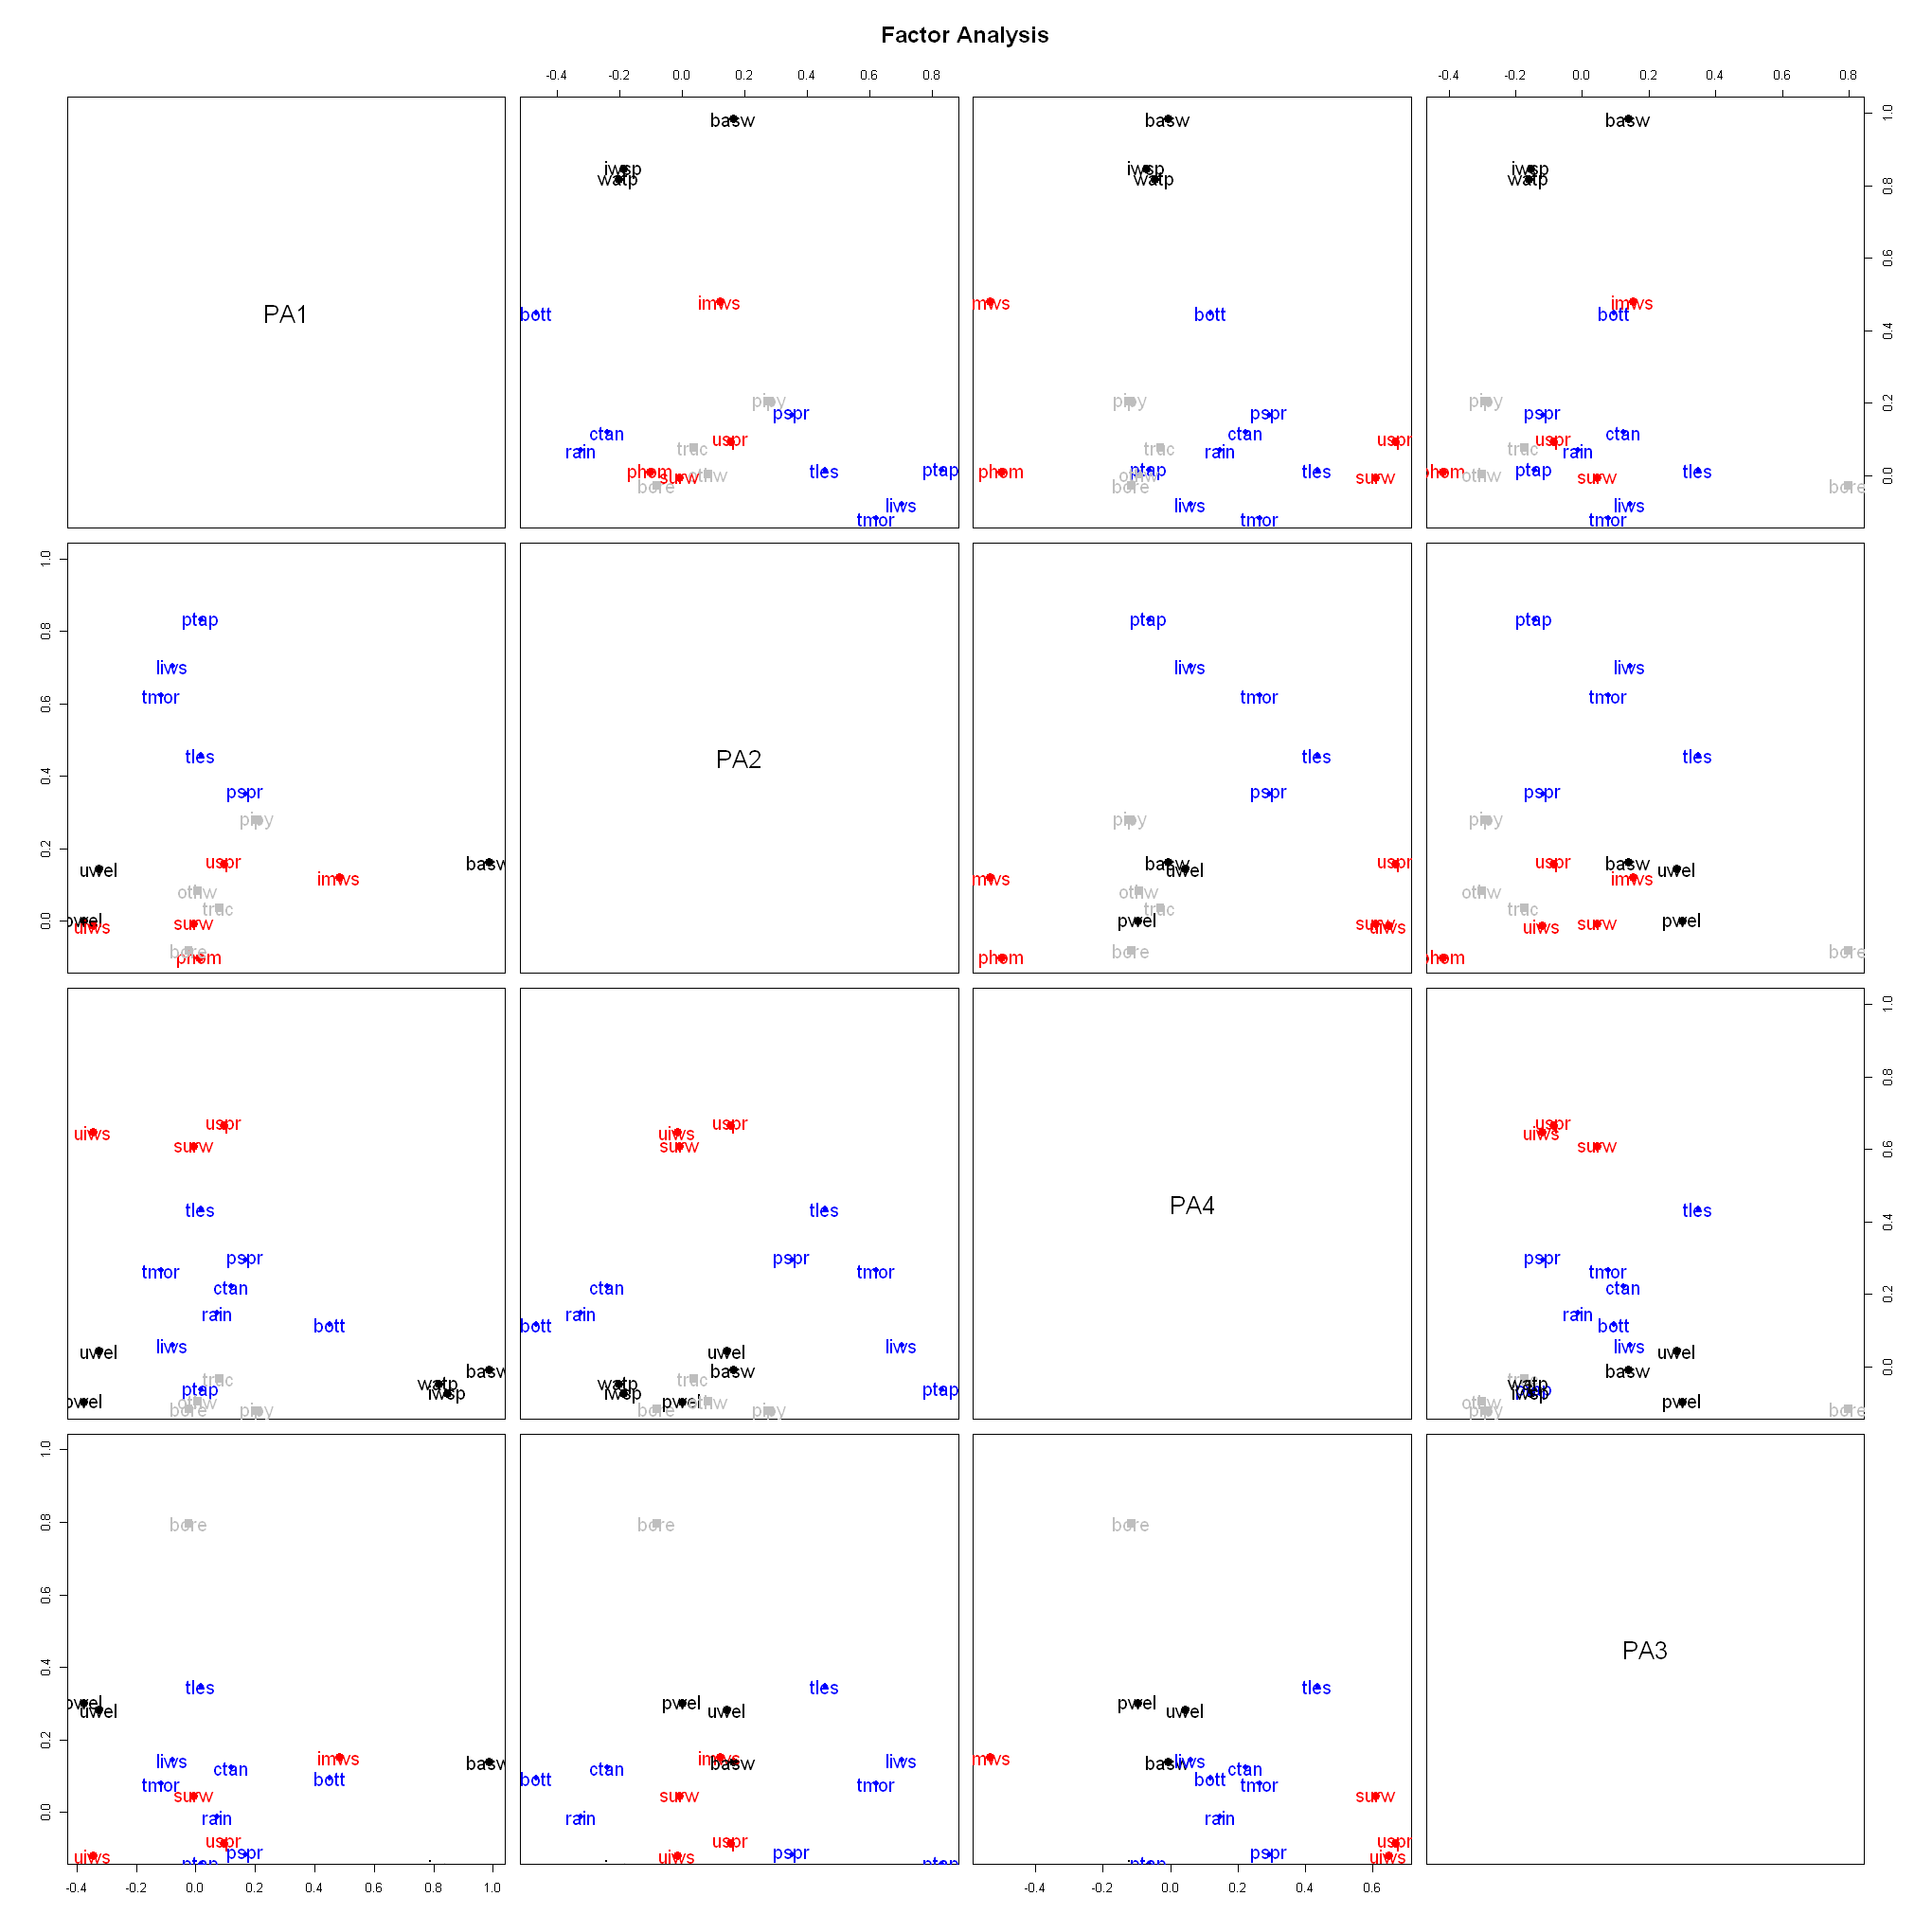

In [196]:
#options(repr.plot.width=15, repr.plot.height=15)
plot(solution.opt,labels=names(df.wa),cex=1.5, ylim=c(-.1,1)) 


In [216]:
solution.opt

Factor Analysis using method =  pa
Call: fa(r = cor(df.wa), nfactors = 4, rotate = "oblimin", fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
       PA1   PA2   PA4   PA3    h2    u2 com
imws  0.48  0.12 -0.54  0.15 0.688 0.312 2.3
phom  0.01 -0.10 -0.50 -0.42 0.560 0.440 2.0
pipy  0.21  0.28 -0.12 -0.29 0.162 0.838 3.2
ptap  0.02  0.83 -0.06 -0.14 0.609 0.391 1.1
bore -0.03 -0.08 -0.12  0.80 0.599 0.401 1.1
pwel -0.38  0.00 -0.10  0.30 0.221 0.779 2.1
pspr  0.17  0.35  0.29 -0.12 0.224 0.776 2.7
rain  0.07 -0.32  0.15 -0.01 0.103 0.897 1.5
uiws -0.34 -0.01  0.65 -0.12 0.711 0.289 1.6
uwel -0.33  0.14  0.04  0.28 0.289 0.711 2.4
uspr  0.09  0.16  0.67 -0.09 0.474 0.526 1.2
truc  0.08  0.04 -0.03 -0.17 0.038 0.962 1.6
ctan  0.12 -0.24  0.22  0.12 0.076 0.924 3.0
bott  0.45 -0.47  0.12  0.09 0.420 0.580 2.2
othw  0.00  0.08 -0.09 -0.30 0.094 0.906 1.4
surw -0.01 -0.01  0.61  0.04 0.379 0.621 1.0
tles  0.02  0.46  0.44  0.35 0.786 0.214 2.9
tmor -0.12  0.62

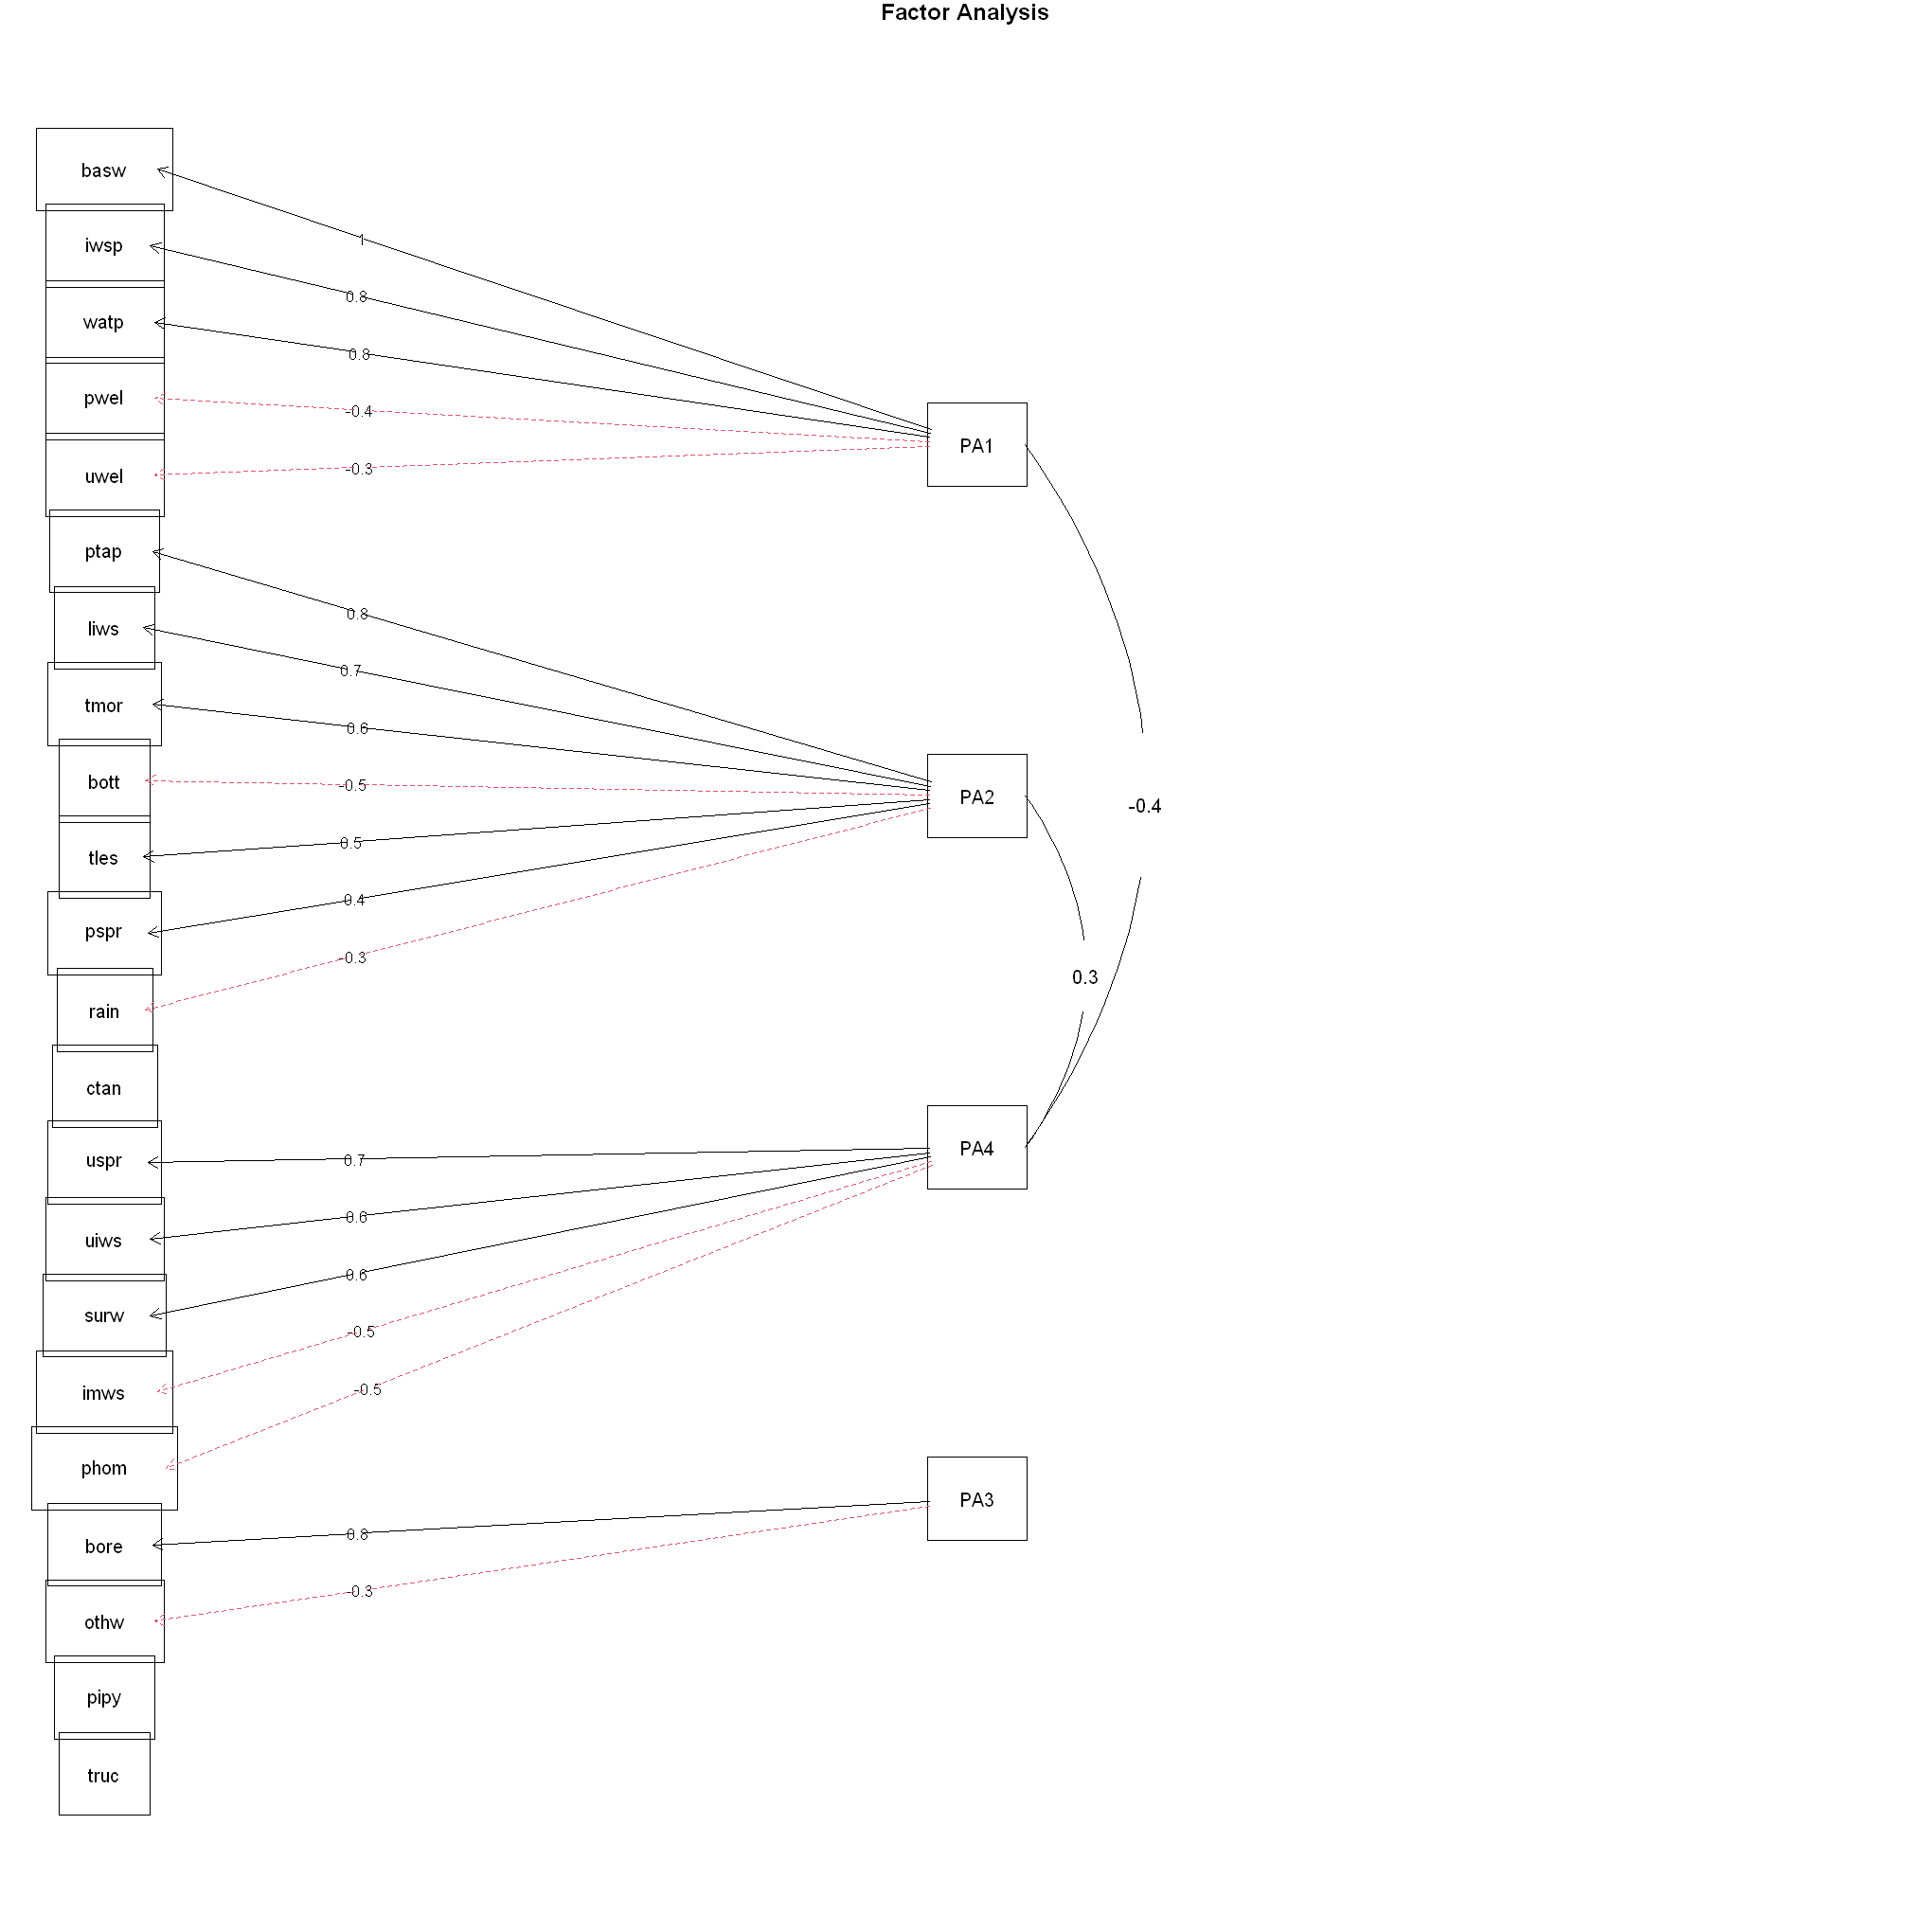

In [217]:
fa.diagram(solution.opt)

# FA

The goal of this study is to analyze the characteristics of water accessibility

sources: http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/115-famd-factor-analysis-of-mixed-data-in-r-essentials/

In [202]:
df.wa <- read_excel("../../results/df-water-access.xlsx",sheet=1)
str(df.wa)
df.wa <- as.numeric(df.wa)
head(df.wa, 7)


tibble [78 x 23] (S3: tbl_df/tbl/data.frame)
 $ Country: chr [1:78] "Afghanistan" "Albania" "Angola" "Armenia" ...
 $ imws   : num [1:78] 71.2 98.4 66.9 99.9 90.6 97.8 71.7 87.3 76 80.9 ...
 $ phom   : num [1:78] 2.3 48.8 4.3 88.3 34 4.3 5.1 24.6 69.2 2.6 ...
 $ pipy   : num [1:78] 4.8 5.2 9.7 8 19.7 3.3 4.2 54.1 3.5 9.6 ...
 $ ptap   : num [1:78] 14.2 2.4 10.3 0.5 3.5 2.7 13 5.3 0 18.4 ...
 $ bore   : num [1:78] 20.1 1.4 1.9 0.2 9.3 86.4 28.9 0 0 40.6 ...
 $ pwel   : num [1:78] 18.5 4.1 9.1 0.2 6.2 0.2 4.4 1.7 0 9 ...
 $ pspr   : num [1:78] 4.7 2.5 3.3 1 7.5 0 0.3 0 0 0.2 ...
 $ rain   : num [1:78] 0.4 0 1.7 0 0 0.4 0.4 0 0 0 ...
 $ uiws   : num [1:78] 28.7 1.6 33.1 0.1 9.4 2.2 28.3 12.3 24 19.1 ...
 $ uwel   : num [1:78] 11.1 0.8 8.3 0 0.2 0.6 20.8 6.2 0 16.3 ...
 $ uspr   : num [1:78] 8.6 0.8 4.8 0.1 1.1 0.3 1.2 0 0 1.5 ...
 $ truc   : num [1:78] 1.5 14.1 9.7 1.5 9.5 0 0.2 1.7 0 0 ...
 $ ctan   : num [1:78] 4.4 0.2 4.3 0 0.7 0.1 0.3 0 0 0.2 ...
 $ bott   : num [1:78] 0.2 19.6 1.2 0 

ERROR: Error in eval(expr, envir, enclos): 'list' object cannot be coerced to type 'double'


In [203]:
res.famd <- FAMD(df.wa, graph = FALSE)
print(res.famd)

*The results are available in the following objects:

  name          description                             
1 "$eig"        "eigenvalues and inertia"               
2 "$var"        "Results for the variables"             
3 "$ind"        "results for the individuals"           
4 "$quali.var"  "Results for the qualitative variables" 
5 "$quanti.var" "Results for the quantitative variables"


# Eigenvalues / Variances

In [204]:
eig.val <- get_eigenvalue(res.famd)
head(eig.val)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,7.525851,7.601869,7.601869
Dim.2,3.301168,3.334513,10.936382
Dim.3,2.792369,2.820575,13.756957
Dim.4,2.692574,2.719772,16.476728
Dim.5,2.431643,2.456205,18.932933


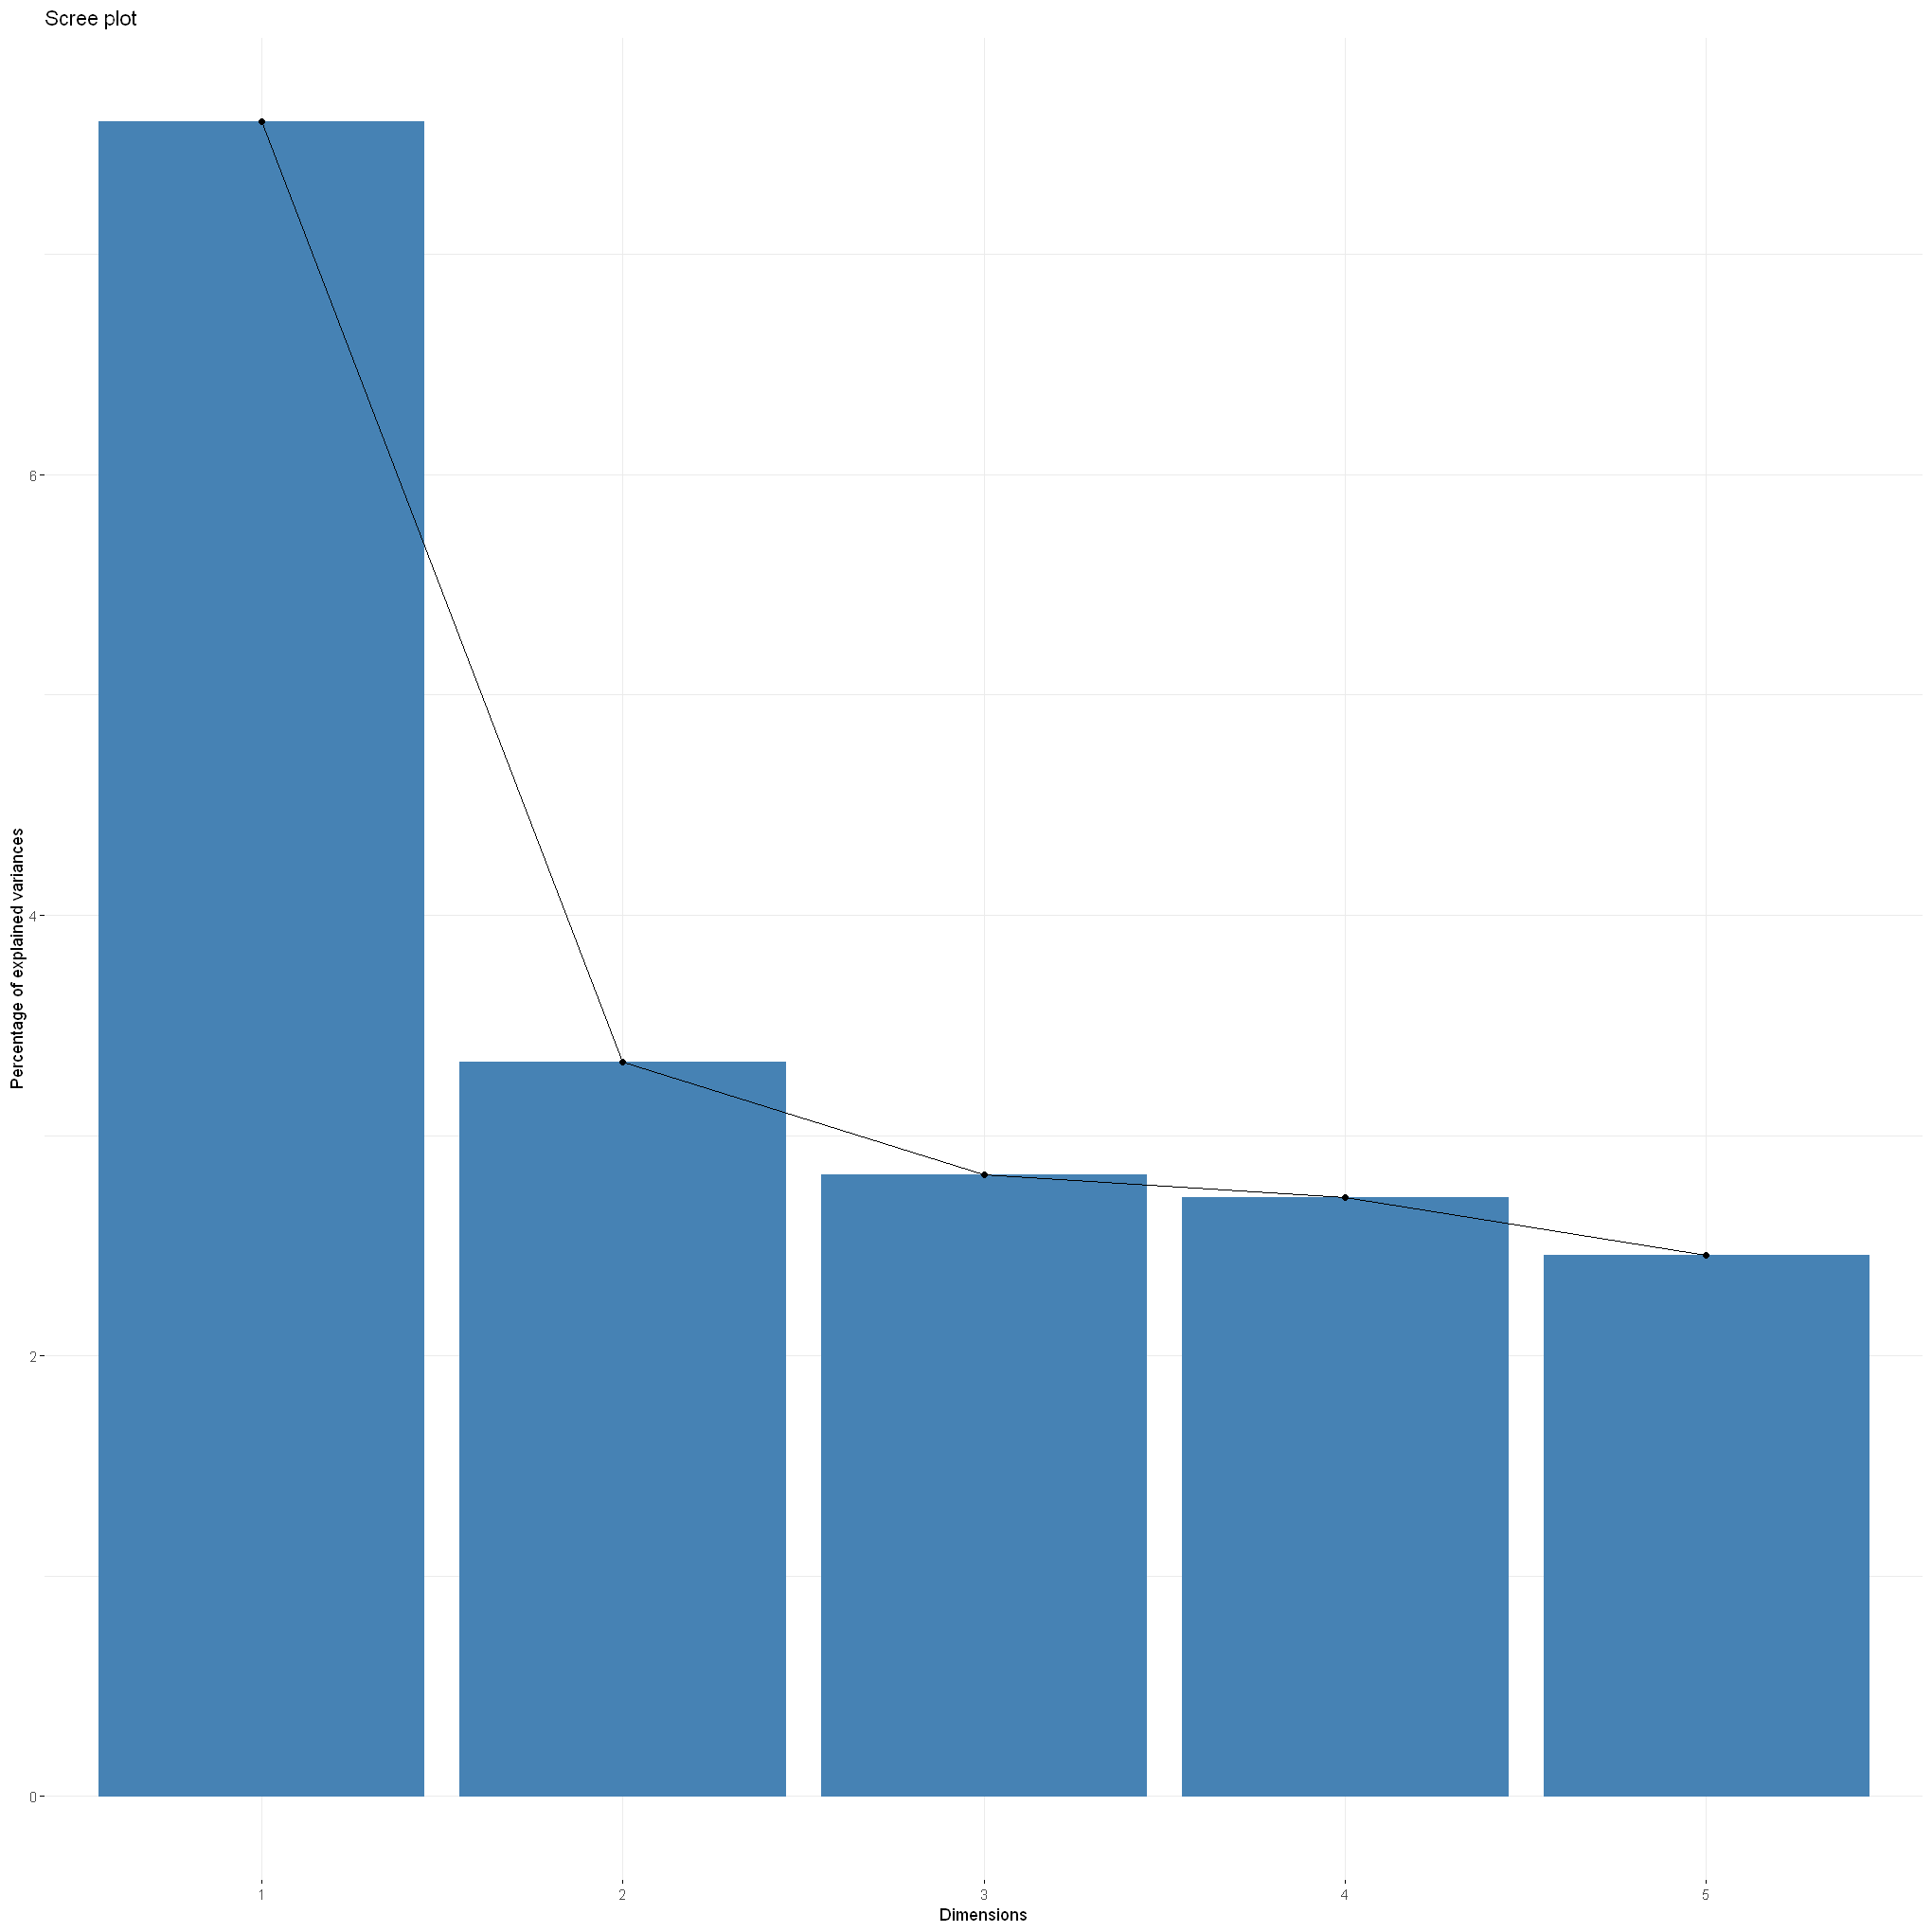

In [205]:
fviz_screeplot(res.famd)

#  All variables

In [206]:
var <- get_famd_var(res.famd)
var

FAMD results for variables 
  Name       Description                      
1 "$coord"   "Coordinates"                    
2 "$cos2"    "Cos2, quality of representation"
3 "$contrib" "Contributions"                  

In [207]:
# Coordinates of variables
head(var$coord,7)
# Cos2: quality of representation on the factore map
head(var$cos2,7)
# Contributions to the  dimensions
head(var$contrib,7)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
imws,0.43398778,0.22966108,0.07035751,0.0004080748,0.0347313293
phom,0.40172974,0.03805686,0.03207963,0.1306418116,0.0582378314
pipy,0.03519815,0.09147590,0.12867084,0.1274395289,0.0950404322
ptap,0.21097955,0.32591036,0.04205954,0.1104469529,0.0003527694
bore,0.03110368,0.05338329,0.55534158,0.0042815512,0.0142737363
pwel,0.13367447,0.02443932,0.21266083,0.0053967415,0.0018375319
pspr,0.09789584,0.14924451,0.13011419,0.1474841909,0.2209695921


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
imws,0.188345396,0.0527442110,0.004950179,1.665250e-07,1.206265e-03
phom,0.161386782,0.0014483248,0.001029103,1.706728e-02,3.391645e-03
pipy,0.001238910,0.0083678411,0.016556185,1.624083e-02,9.032684e-03
ptap,0.044512372,0.1062175613,0.001769005,1.219853e-02,1.244463e-07
bore,0.000967439,0.0028497753,0.308404275,1.833168e-05,2.037395e-04
pwel,0.017868865,0.0005972803,0.045224630,2.912482e-05,3.376524e-06
pspr,0.009583595,0.0222739248,0.016929703,2.175159e-02,4.882756e-02


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
imws,5.7666277,6.9569643,2.519635,0.01515556,1.42830737
phom,5.3379978,1.1528302,1.148832,4.85193055,2.39499972
pipy,0.4676967,2.7710164,4.607946,4.73300038,3.90848703
ptap,2.8033981,9.8725772,1.506232,4.10190994,0.01450745
bore,0.4132912,1.6171030,19.887831,0.15901333,0.58699978
pwel,1.7762042,0.7403234,7.615786,0.20043059,0.07556752
pspr,1.3007943,4.5209609,4.659635,5.47744281,9.08725649


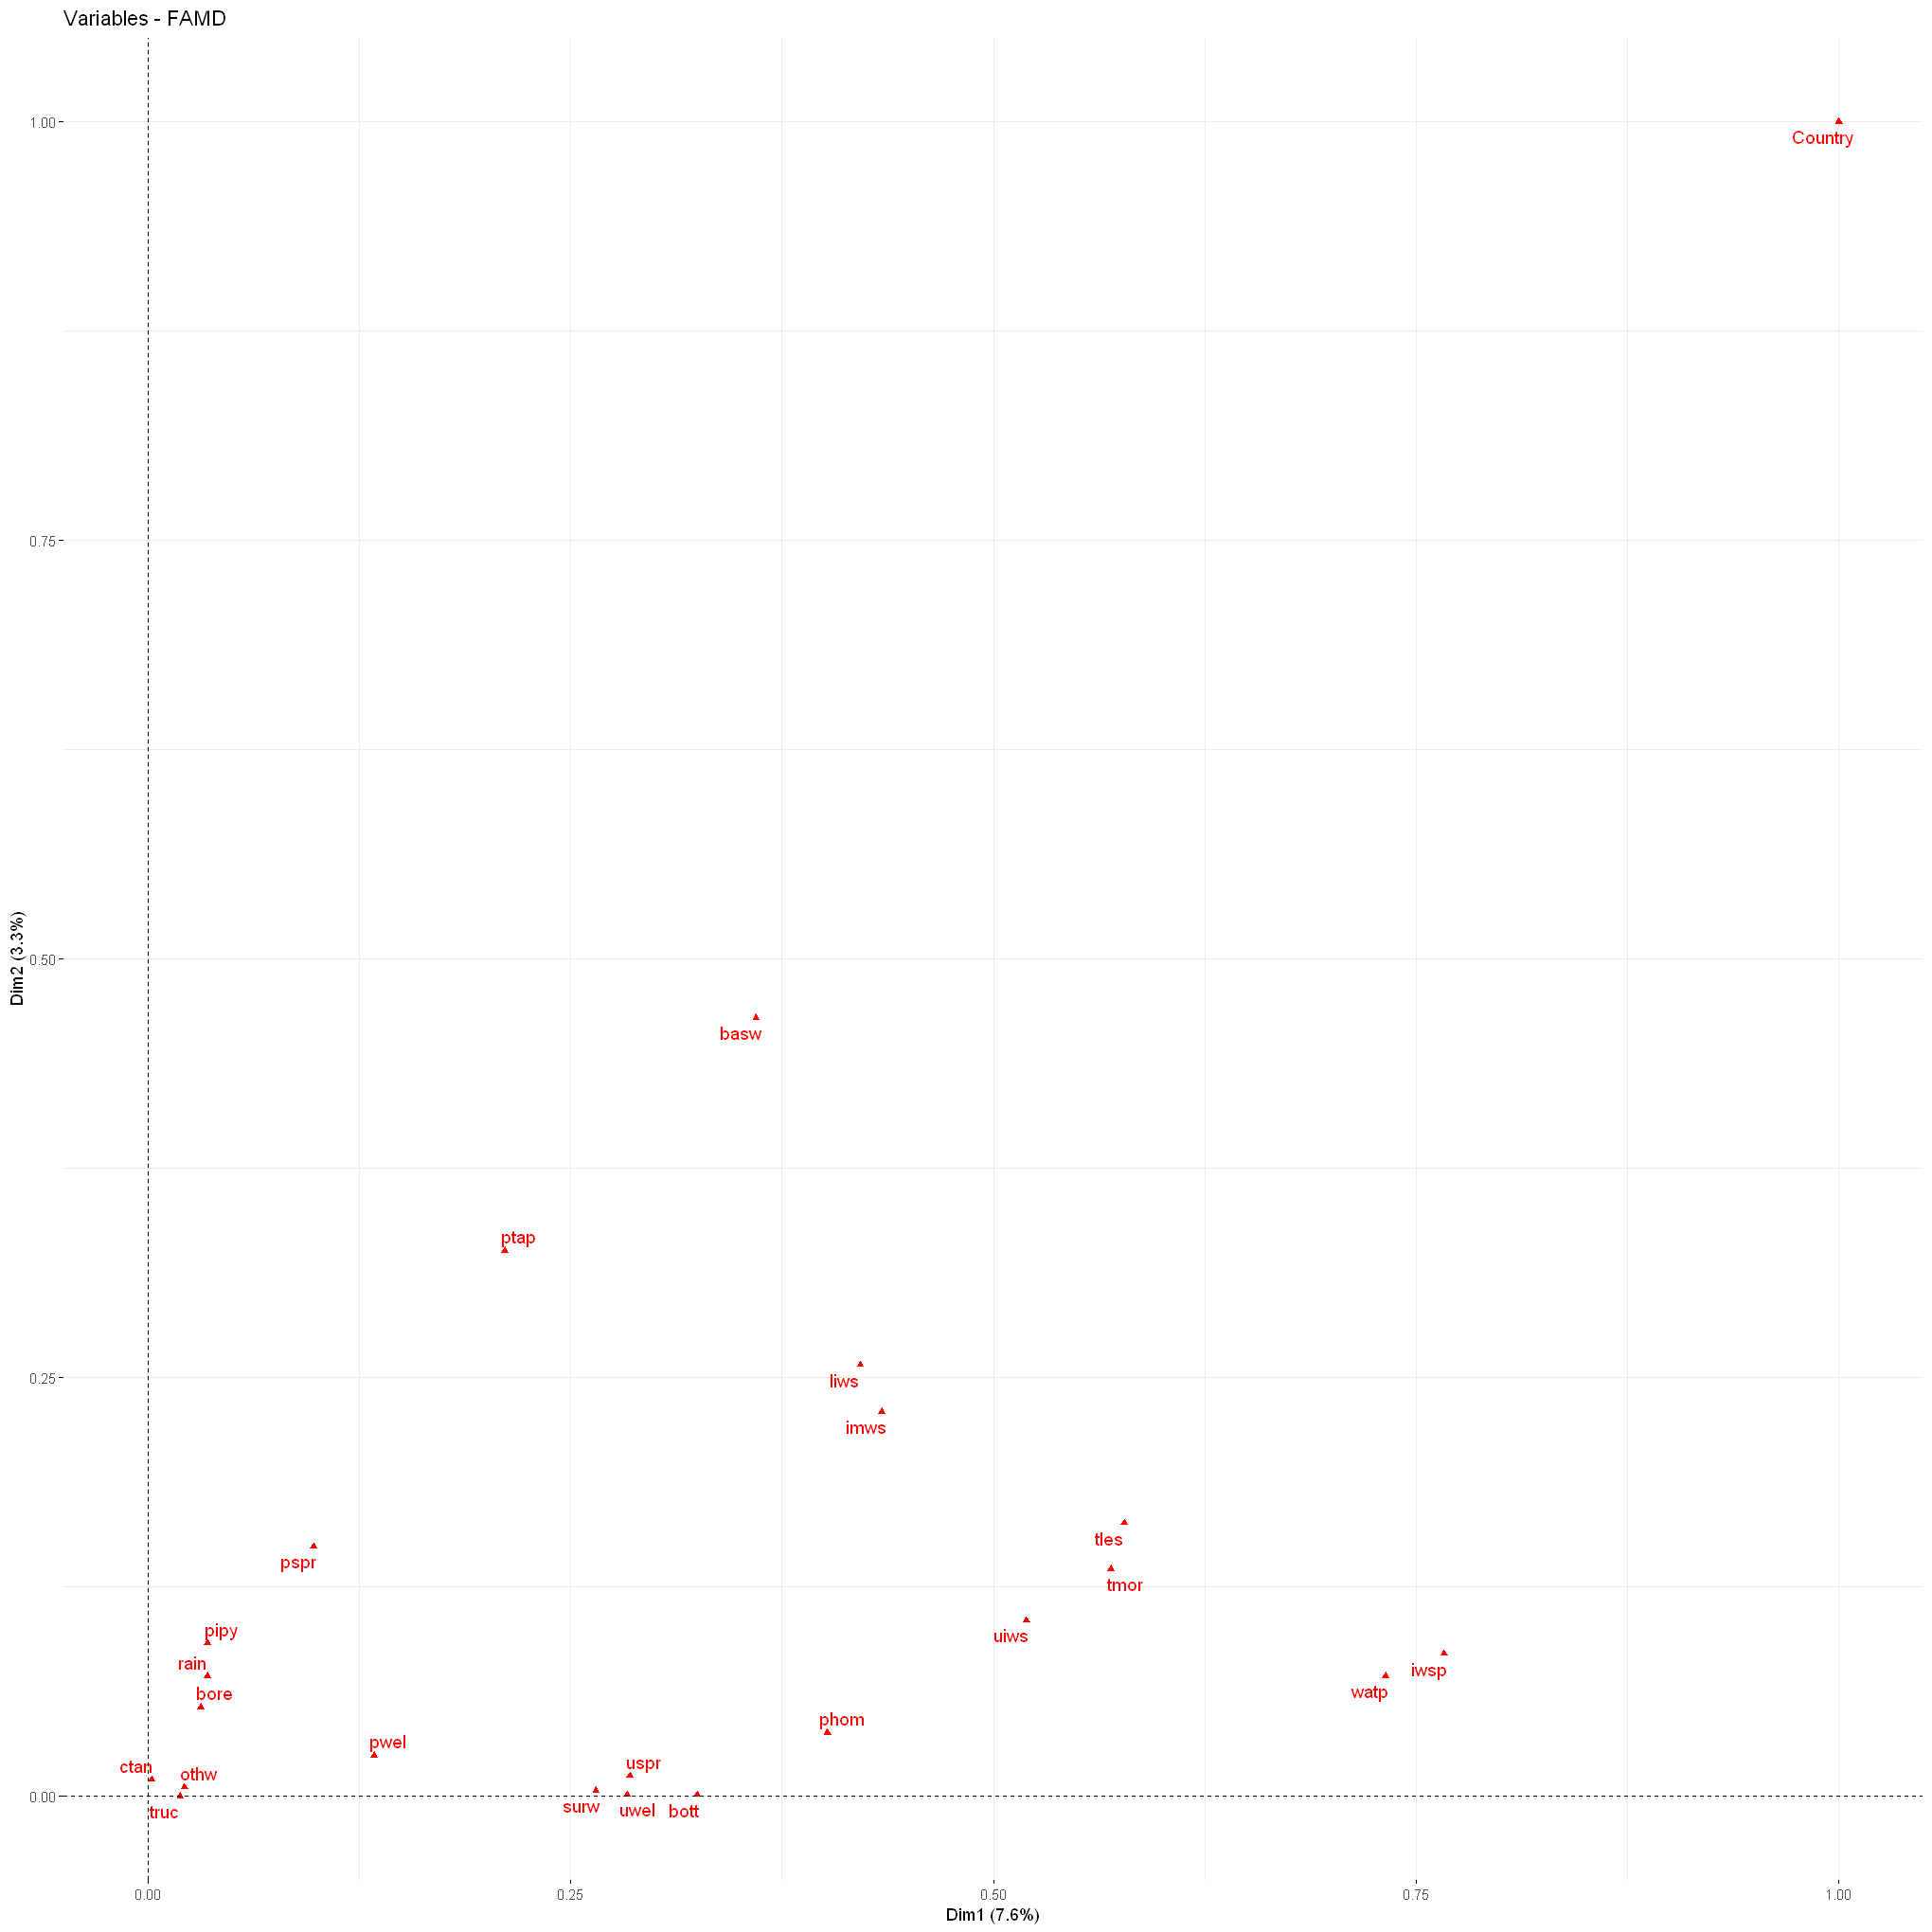

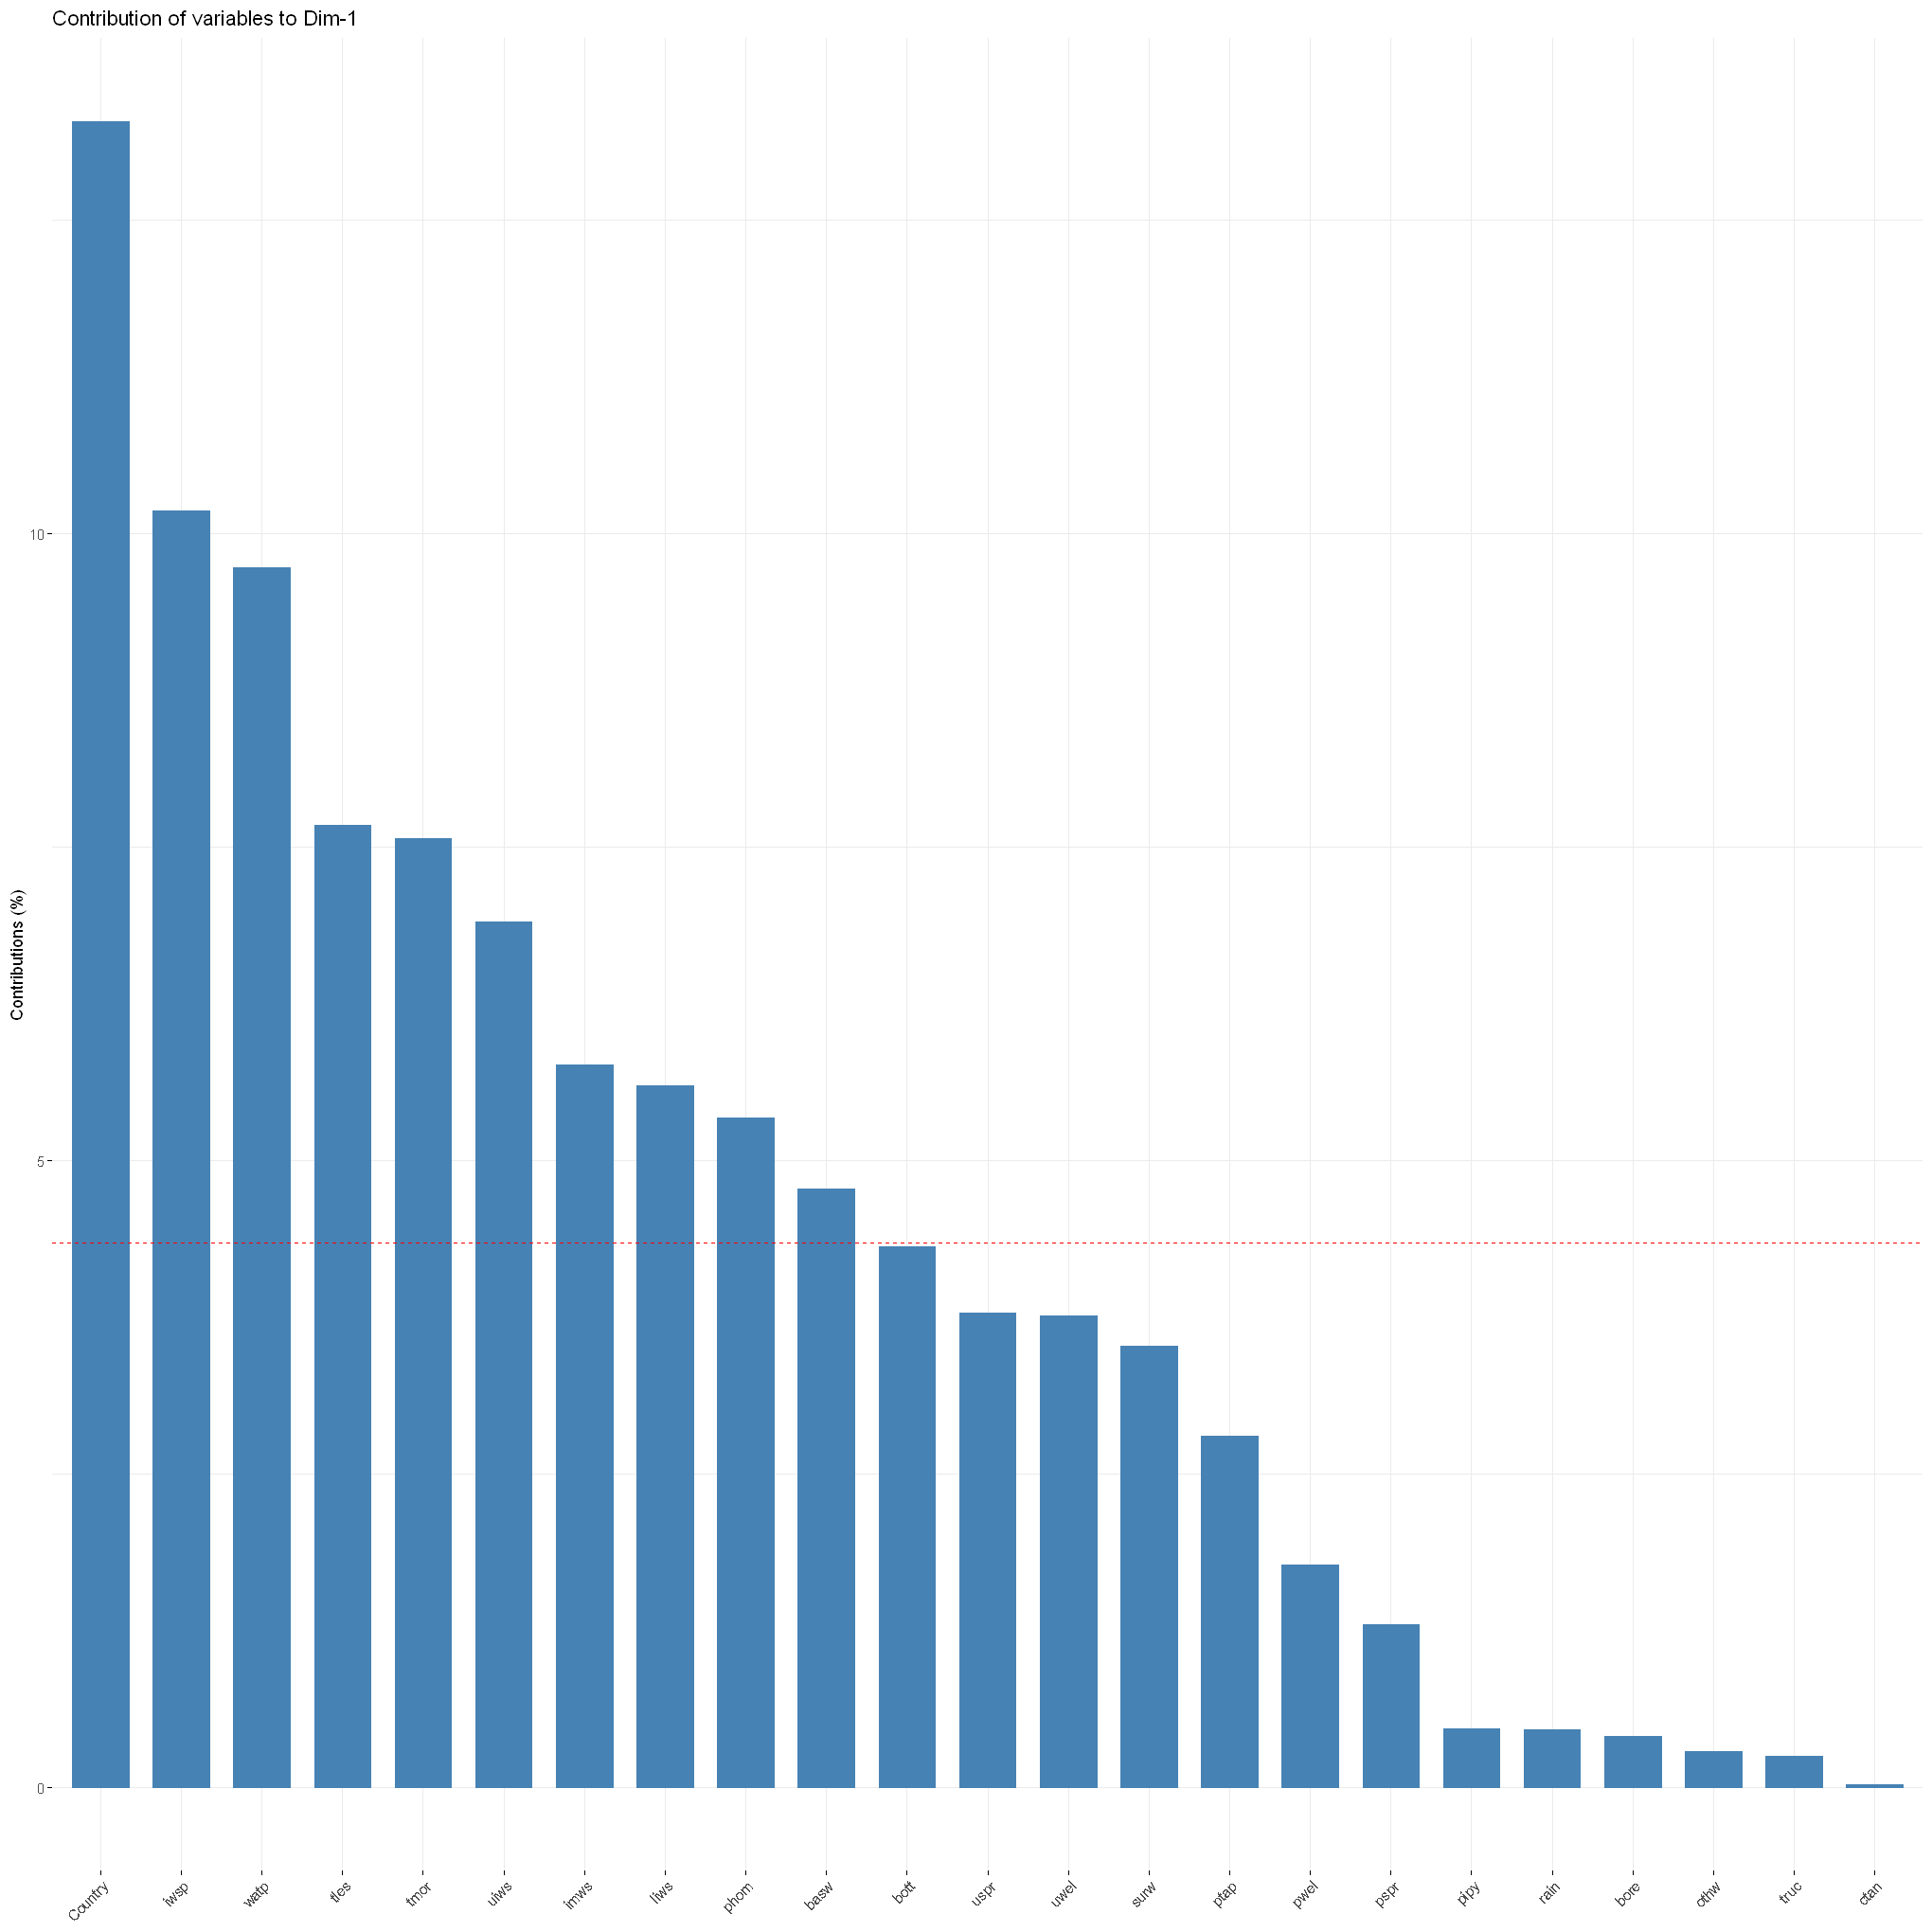

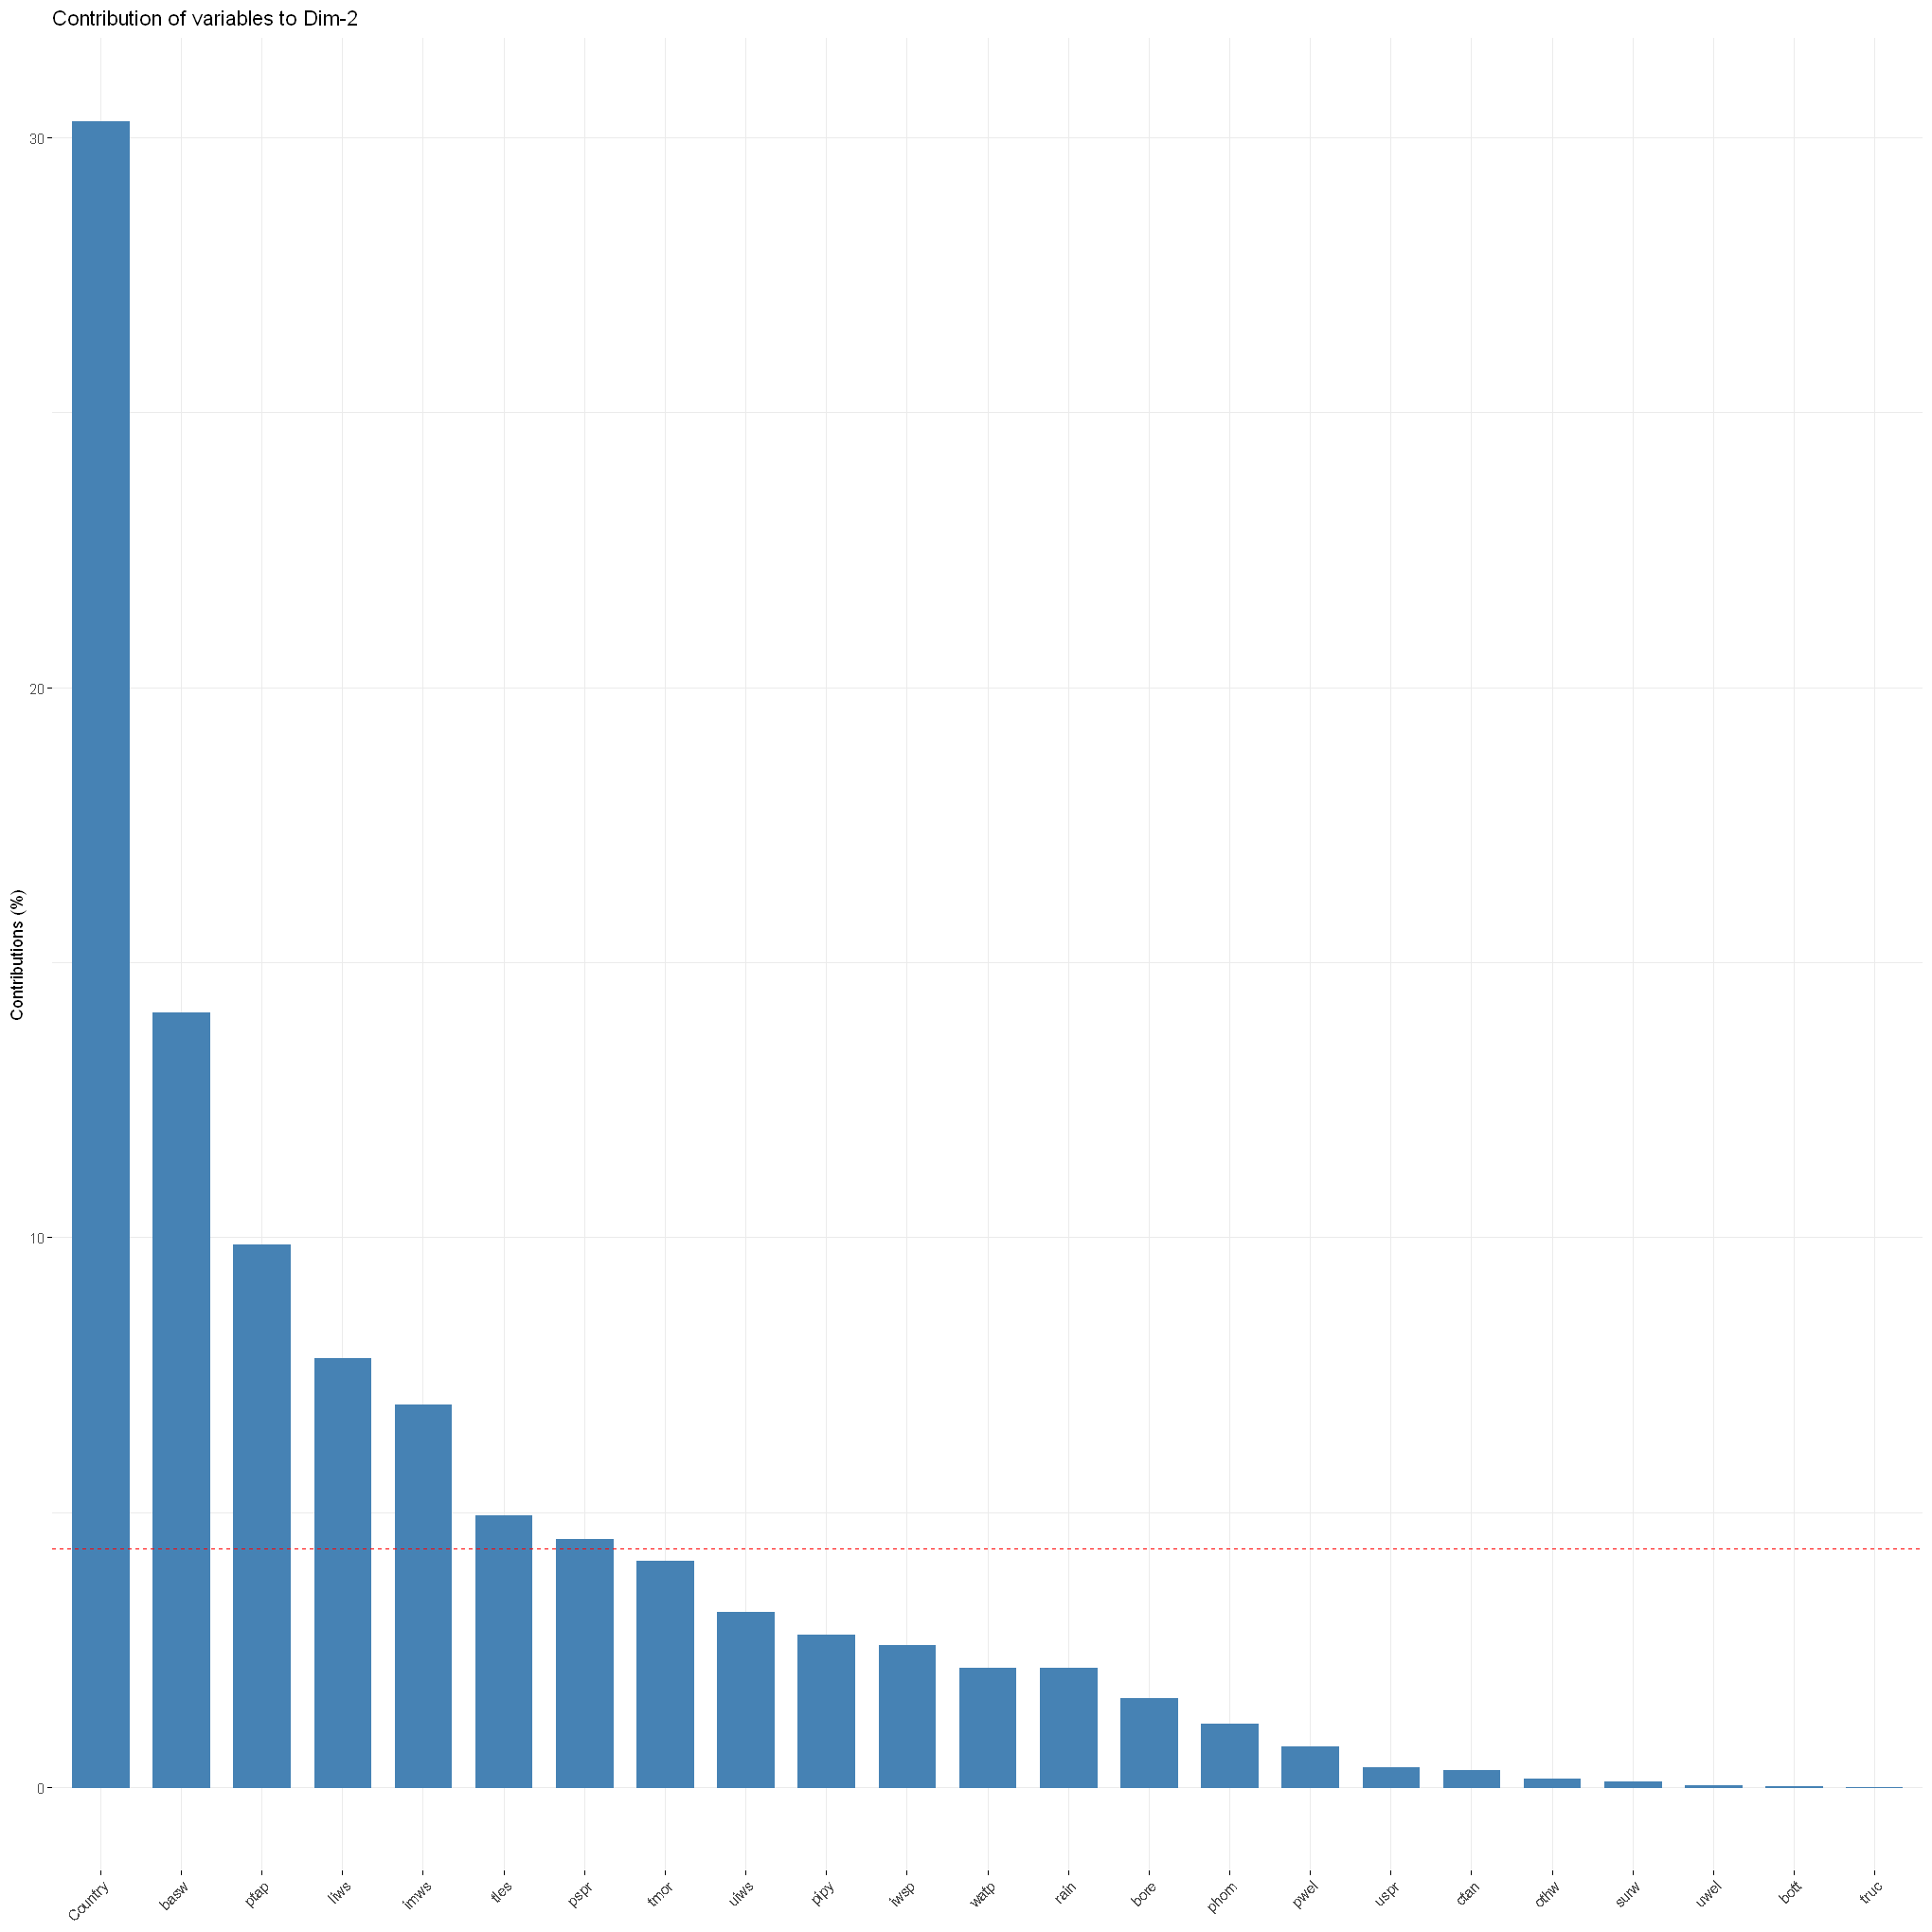

In [208]:
# Plot of variables
fviz_famd_var(res.famd, repel = TRUE)
# Contribution to the first dimension
fviz_contrib(res.famd, "var", axes = 1)
# Contribution to the second dimension
fviz_contrib(res.famd, "var", axes = 2)

The red dashed line on the graph above indicates the expected average value, If the contributions were uniform.

From the plots above, it can be seen that:

variables that contribute the most to the first dimension are: iwsp and watp.

variables that contribute the most to the second dimension are: basw and ptap.

# Quantitative variables

In [209]:
quanti.var <- get_famd_var(res.famd, "quanti.var")
quanti.var 

FAMD results for quantitative variables 
  Name       Description                      
1 "$coord"   "Coordinates"                    
2 "$cos2"    "Cos2, quality of representation"
3 "$contrib" "Contributions"                  

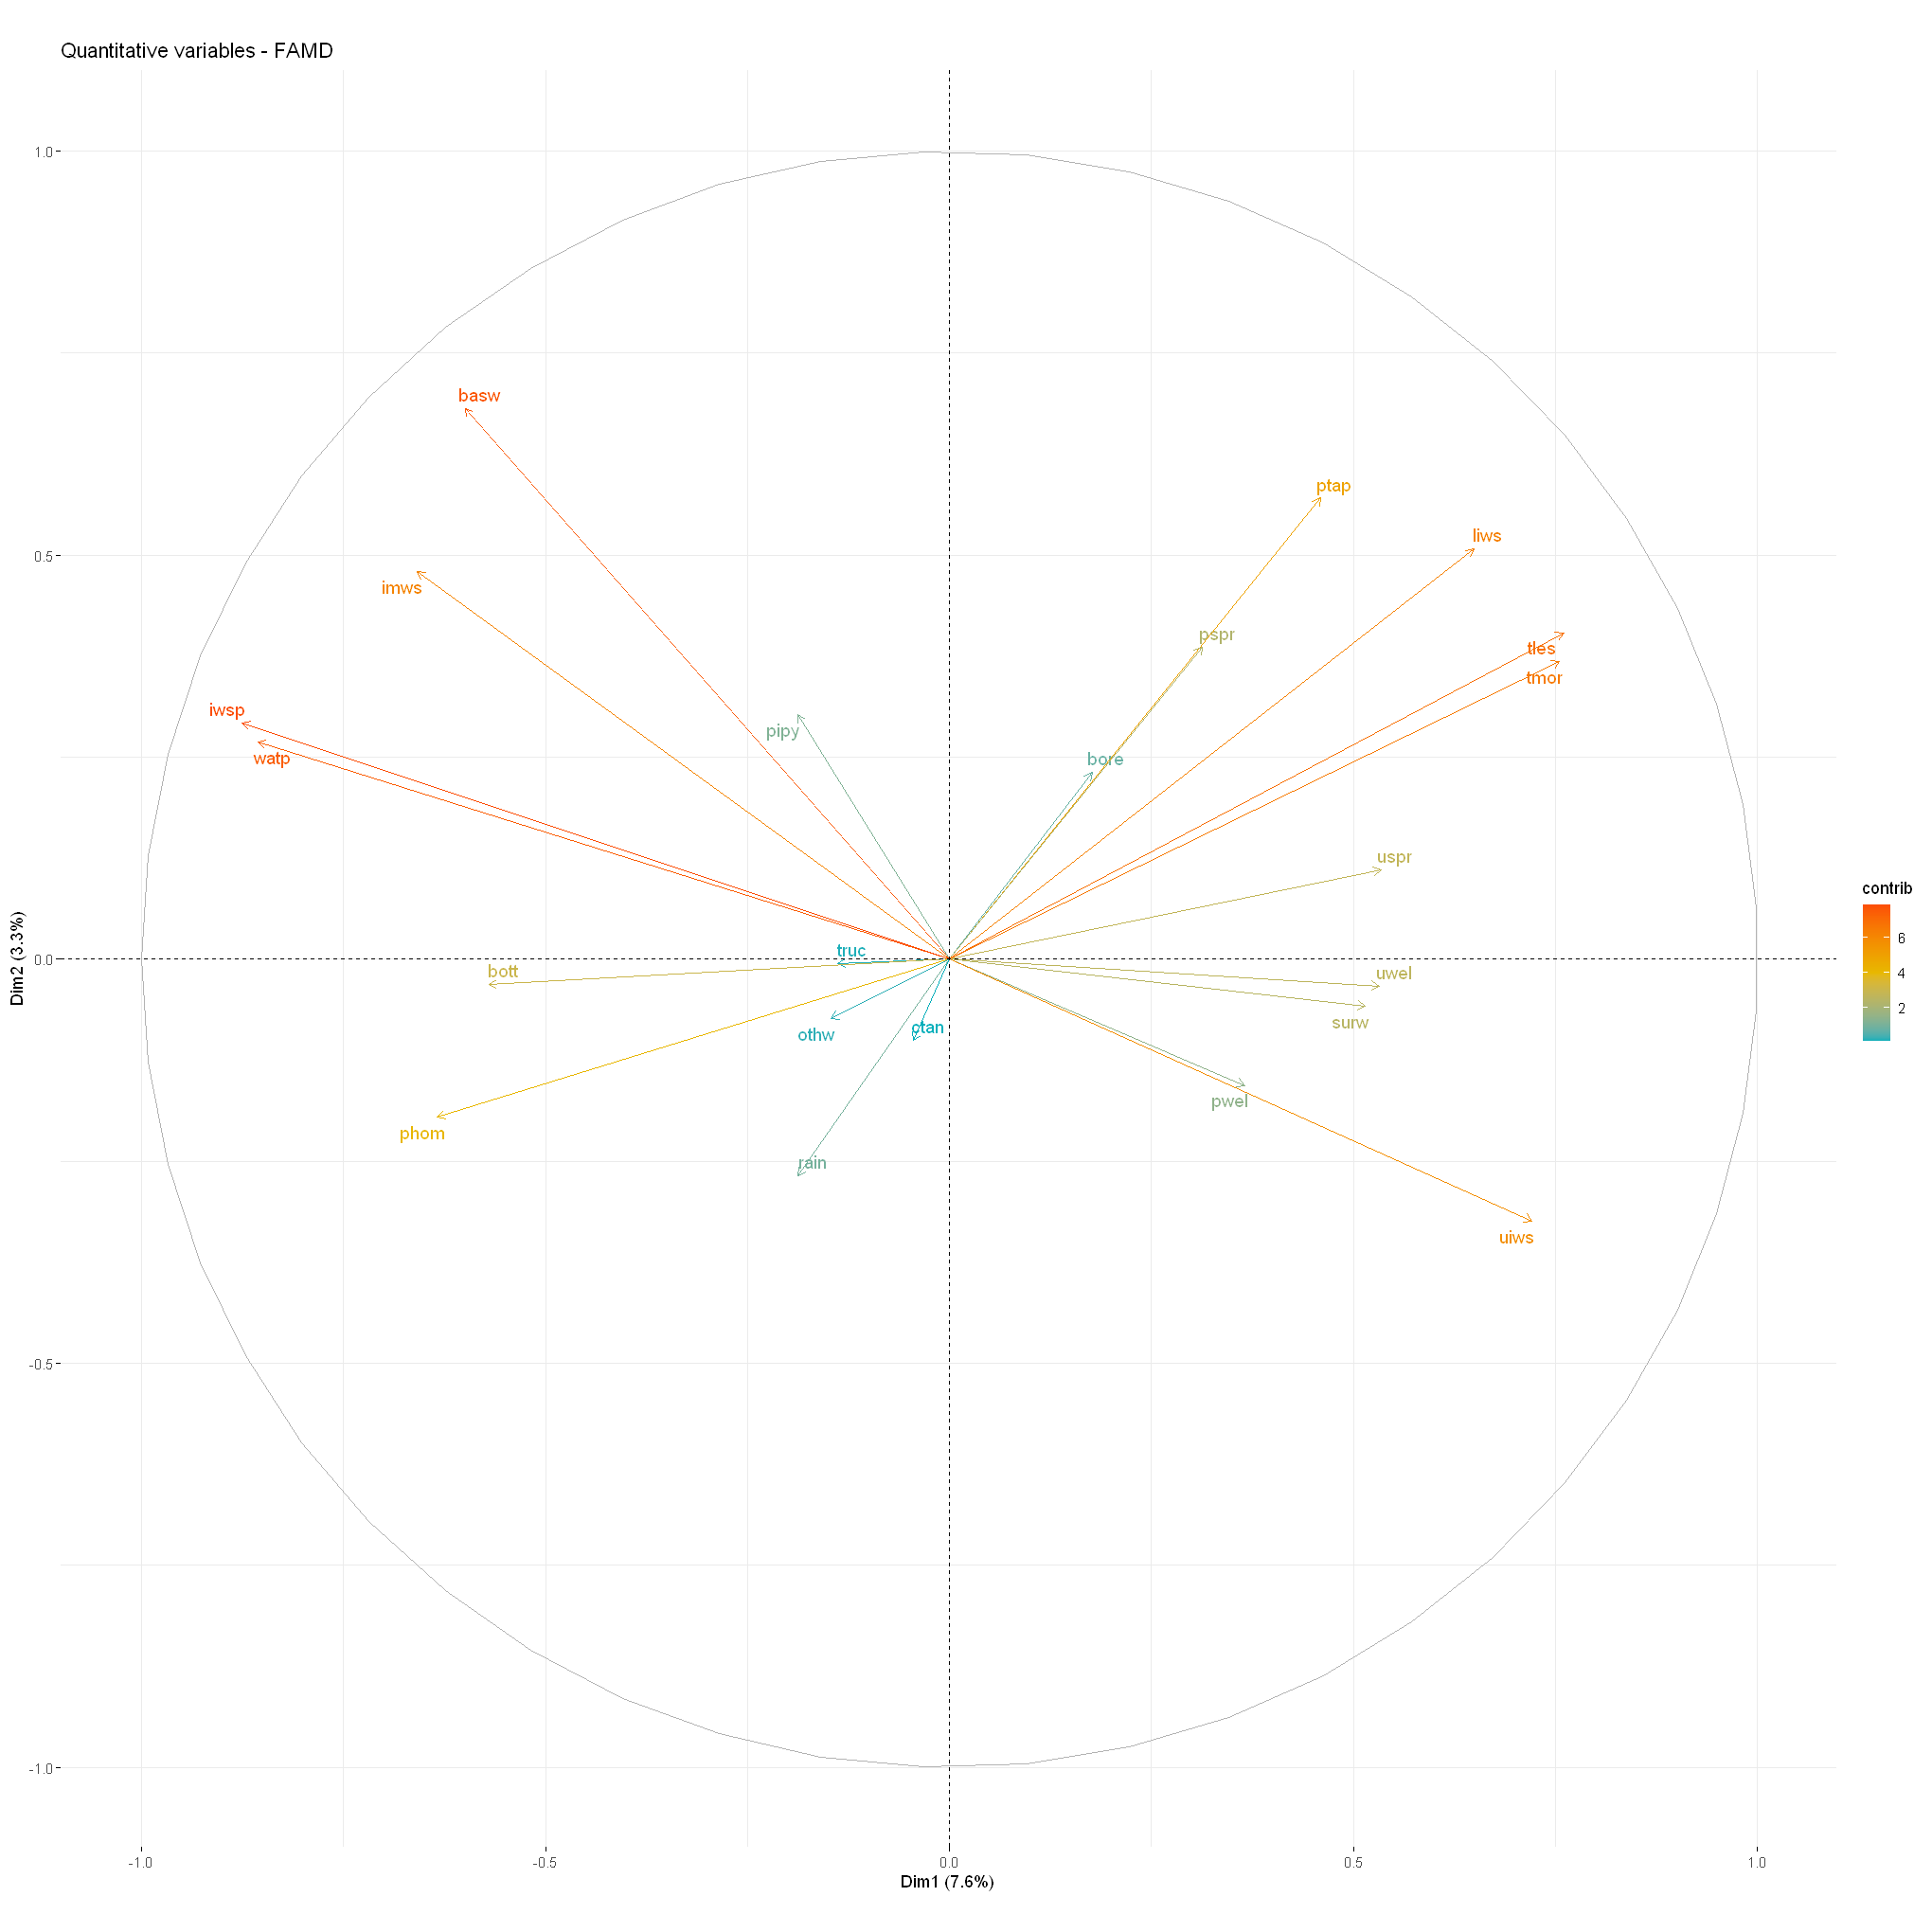

In [210]:
fviz_famd_var(res.famd, "quanti.var", col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

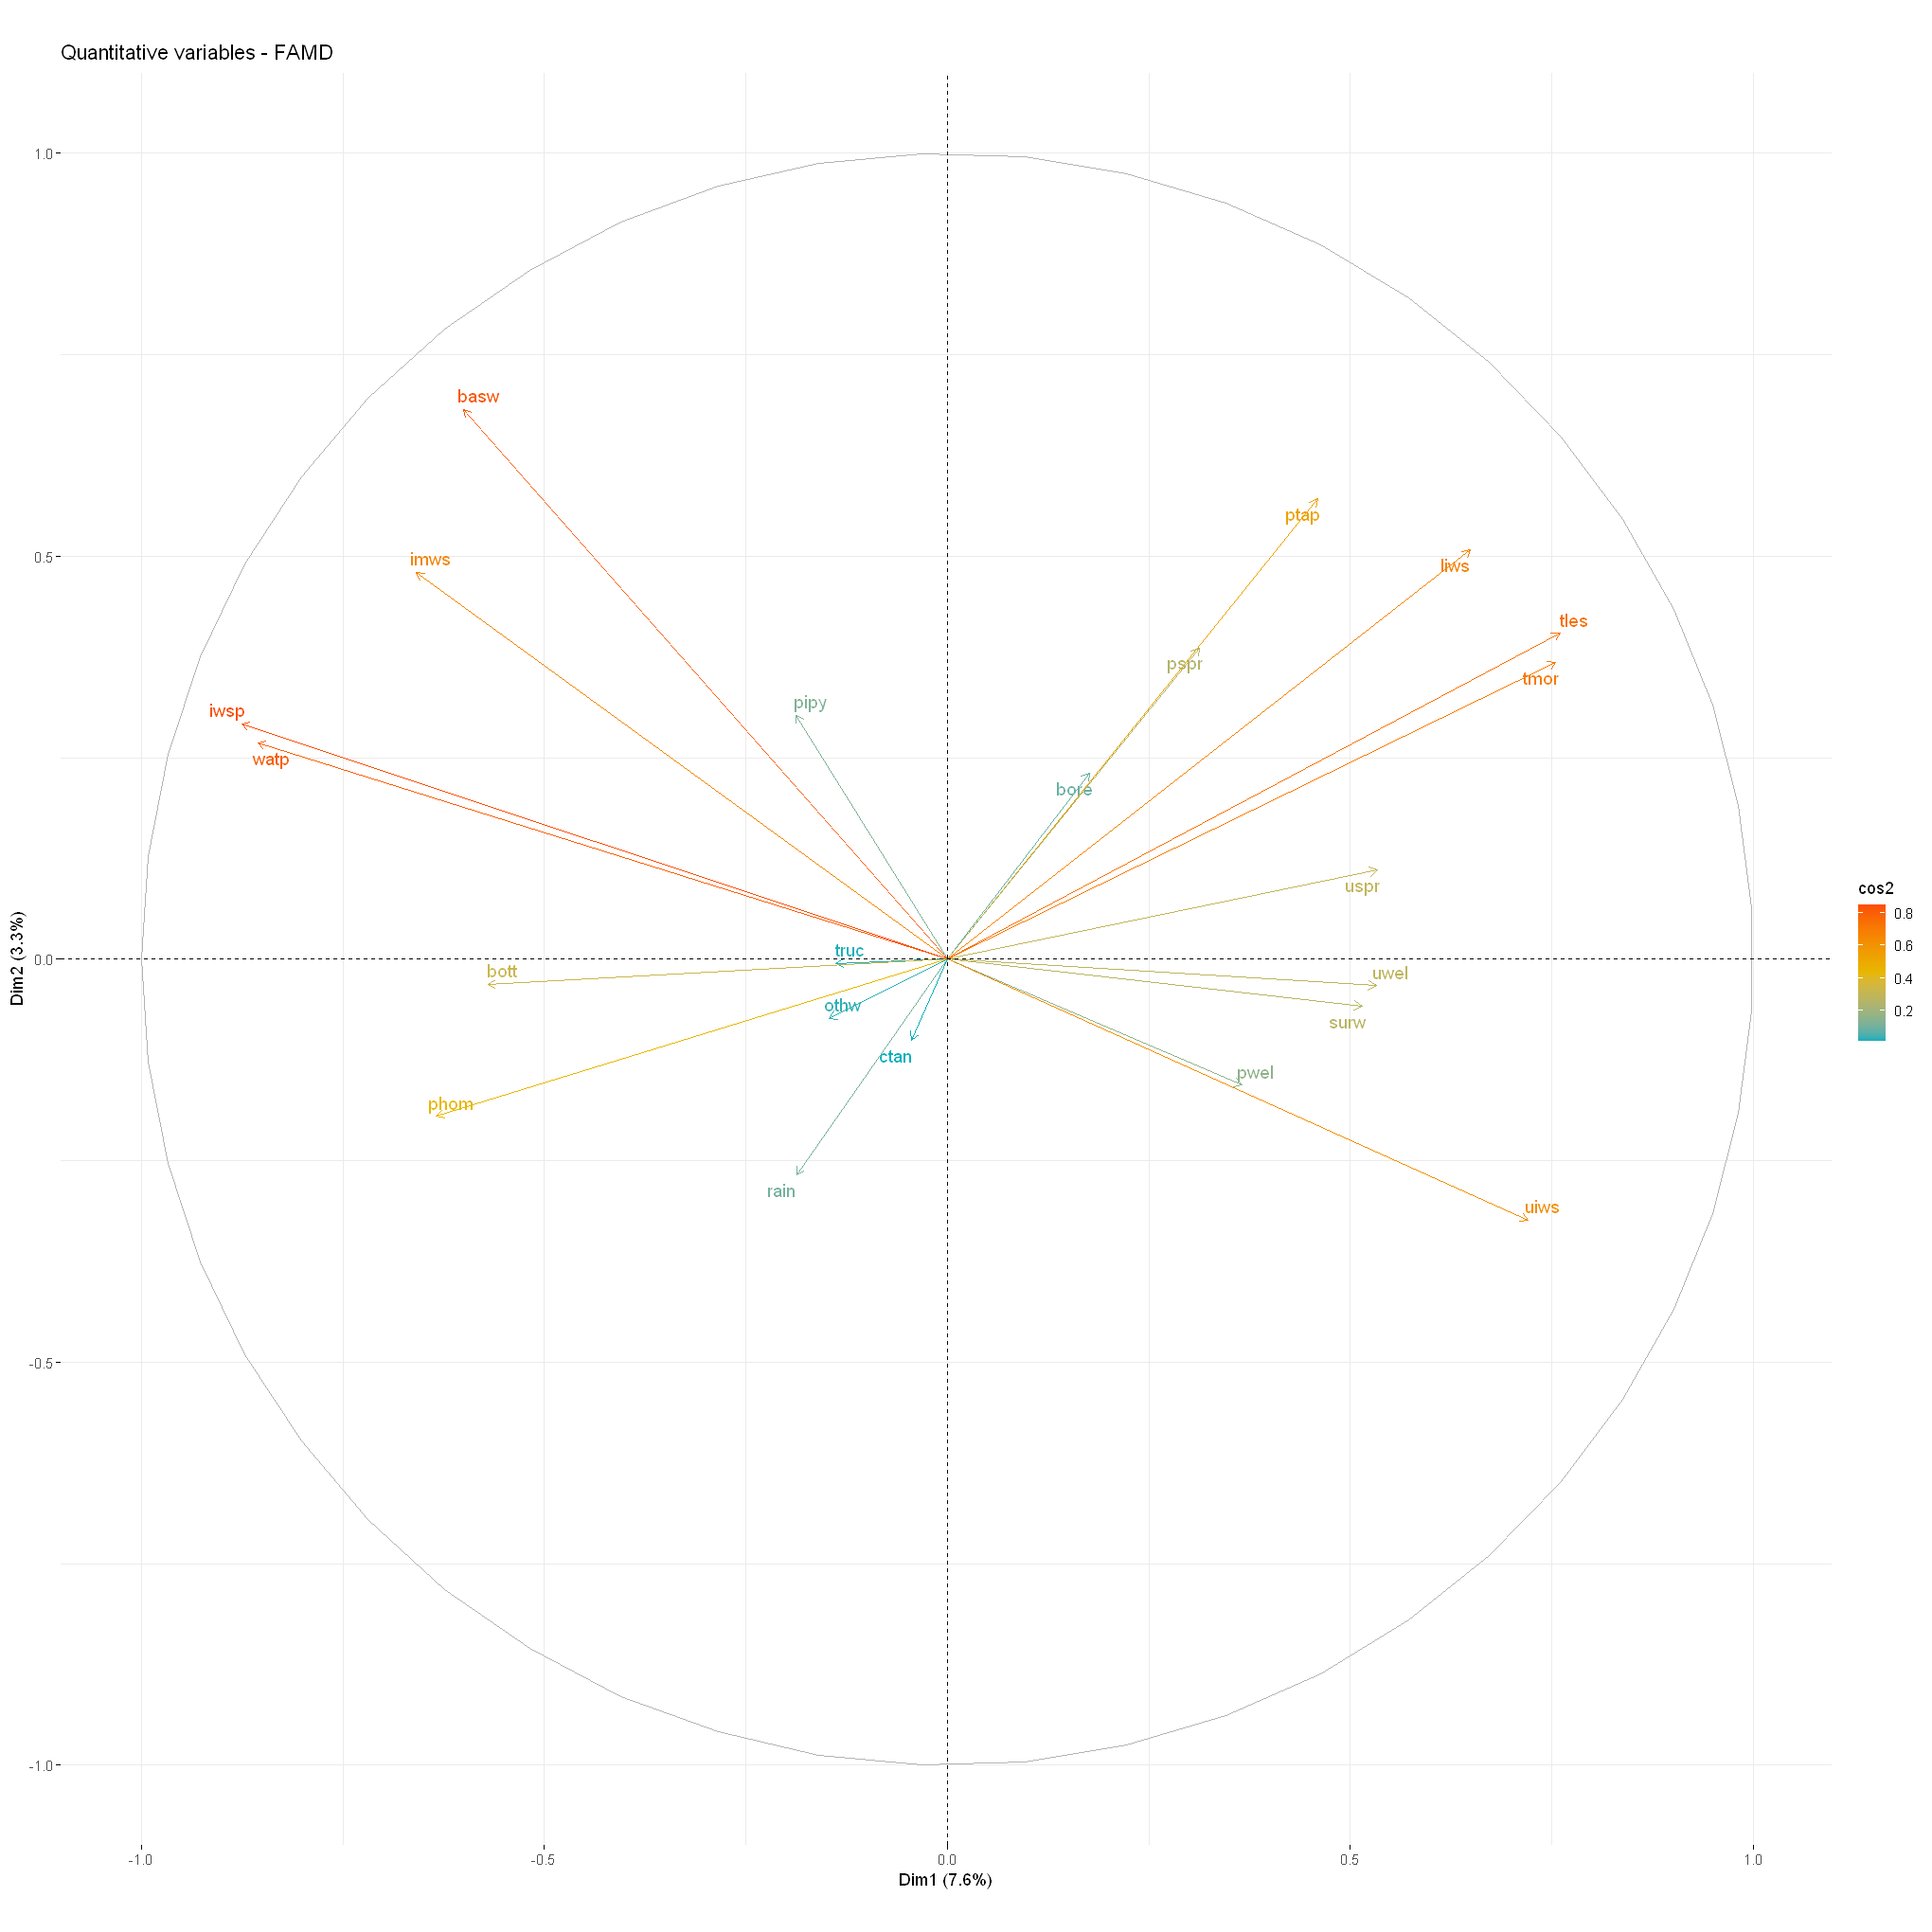

In [211]:
# Color by cos2 values: quality on the factor map
fviz_famd_var(res.famd, "quanti.var", col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE)

# Graph of qualitative variables

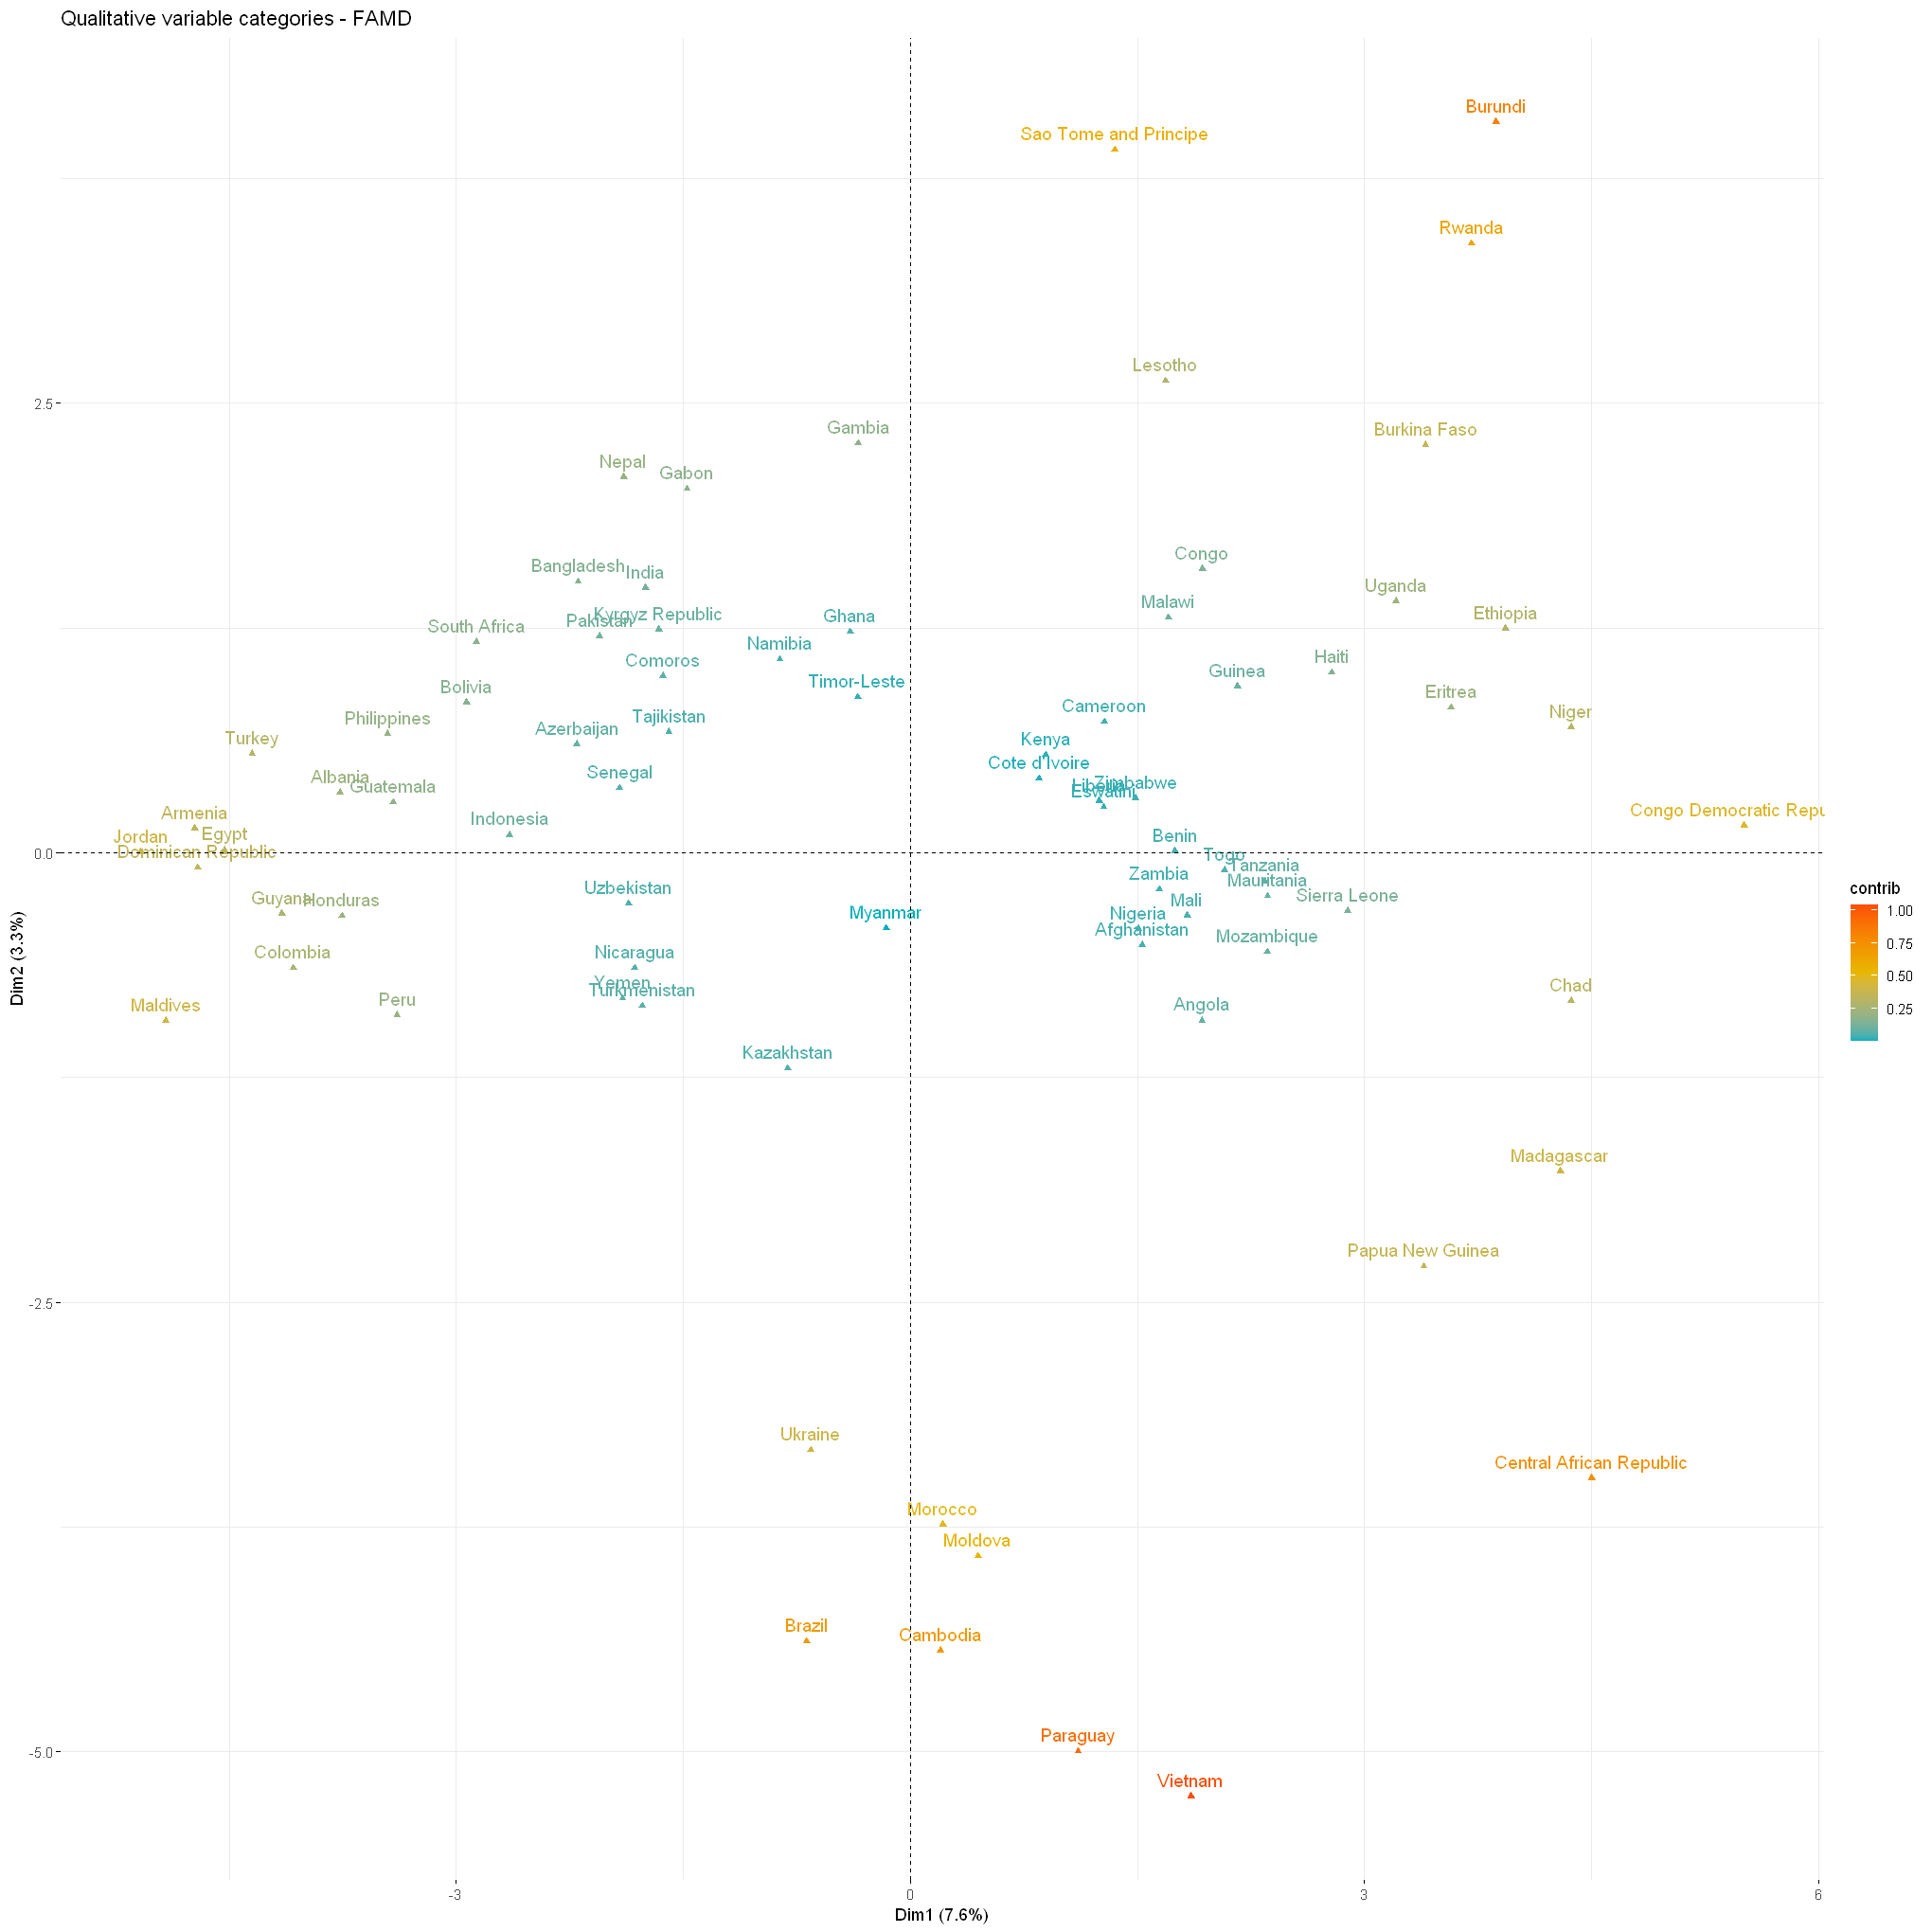

In [212]:
fviz_famd_var(res.famd, "quali.var", col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
             )

# Graph of individuals

In [213]:
ind <- get_famd_ind(res.famd)
ind

FAMD results for individuals 
  Name       Description                      
1 "$coord"   "Coordinates"                    
2 "$cos2"    "Cos2, quality of representation"
3 "$contrib" "Contributions"                  

Warning message:
"ggrepel: 20 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


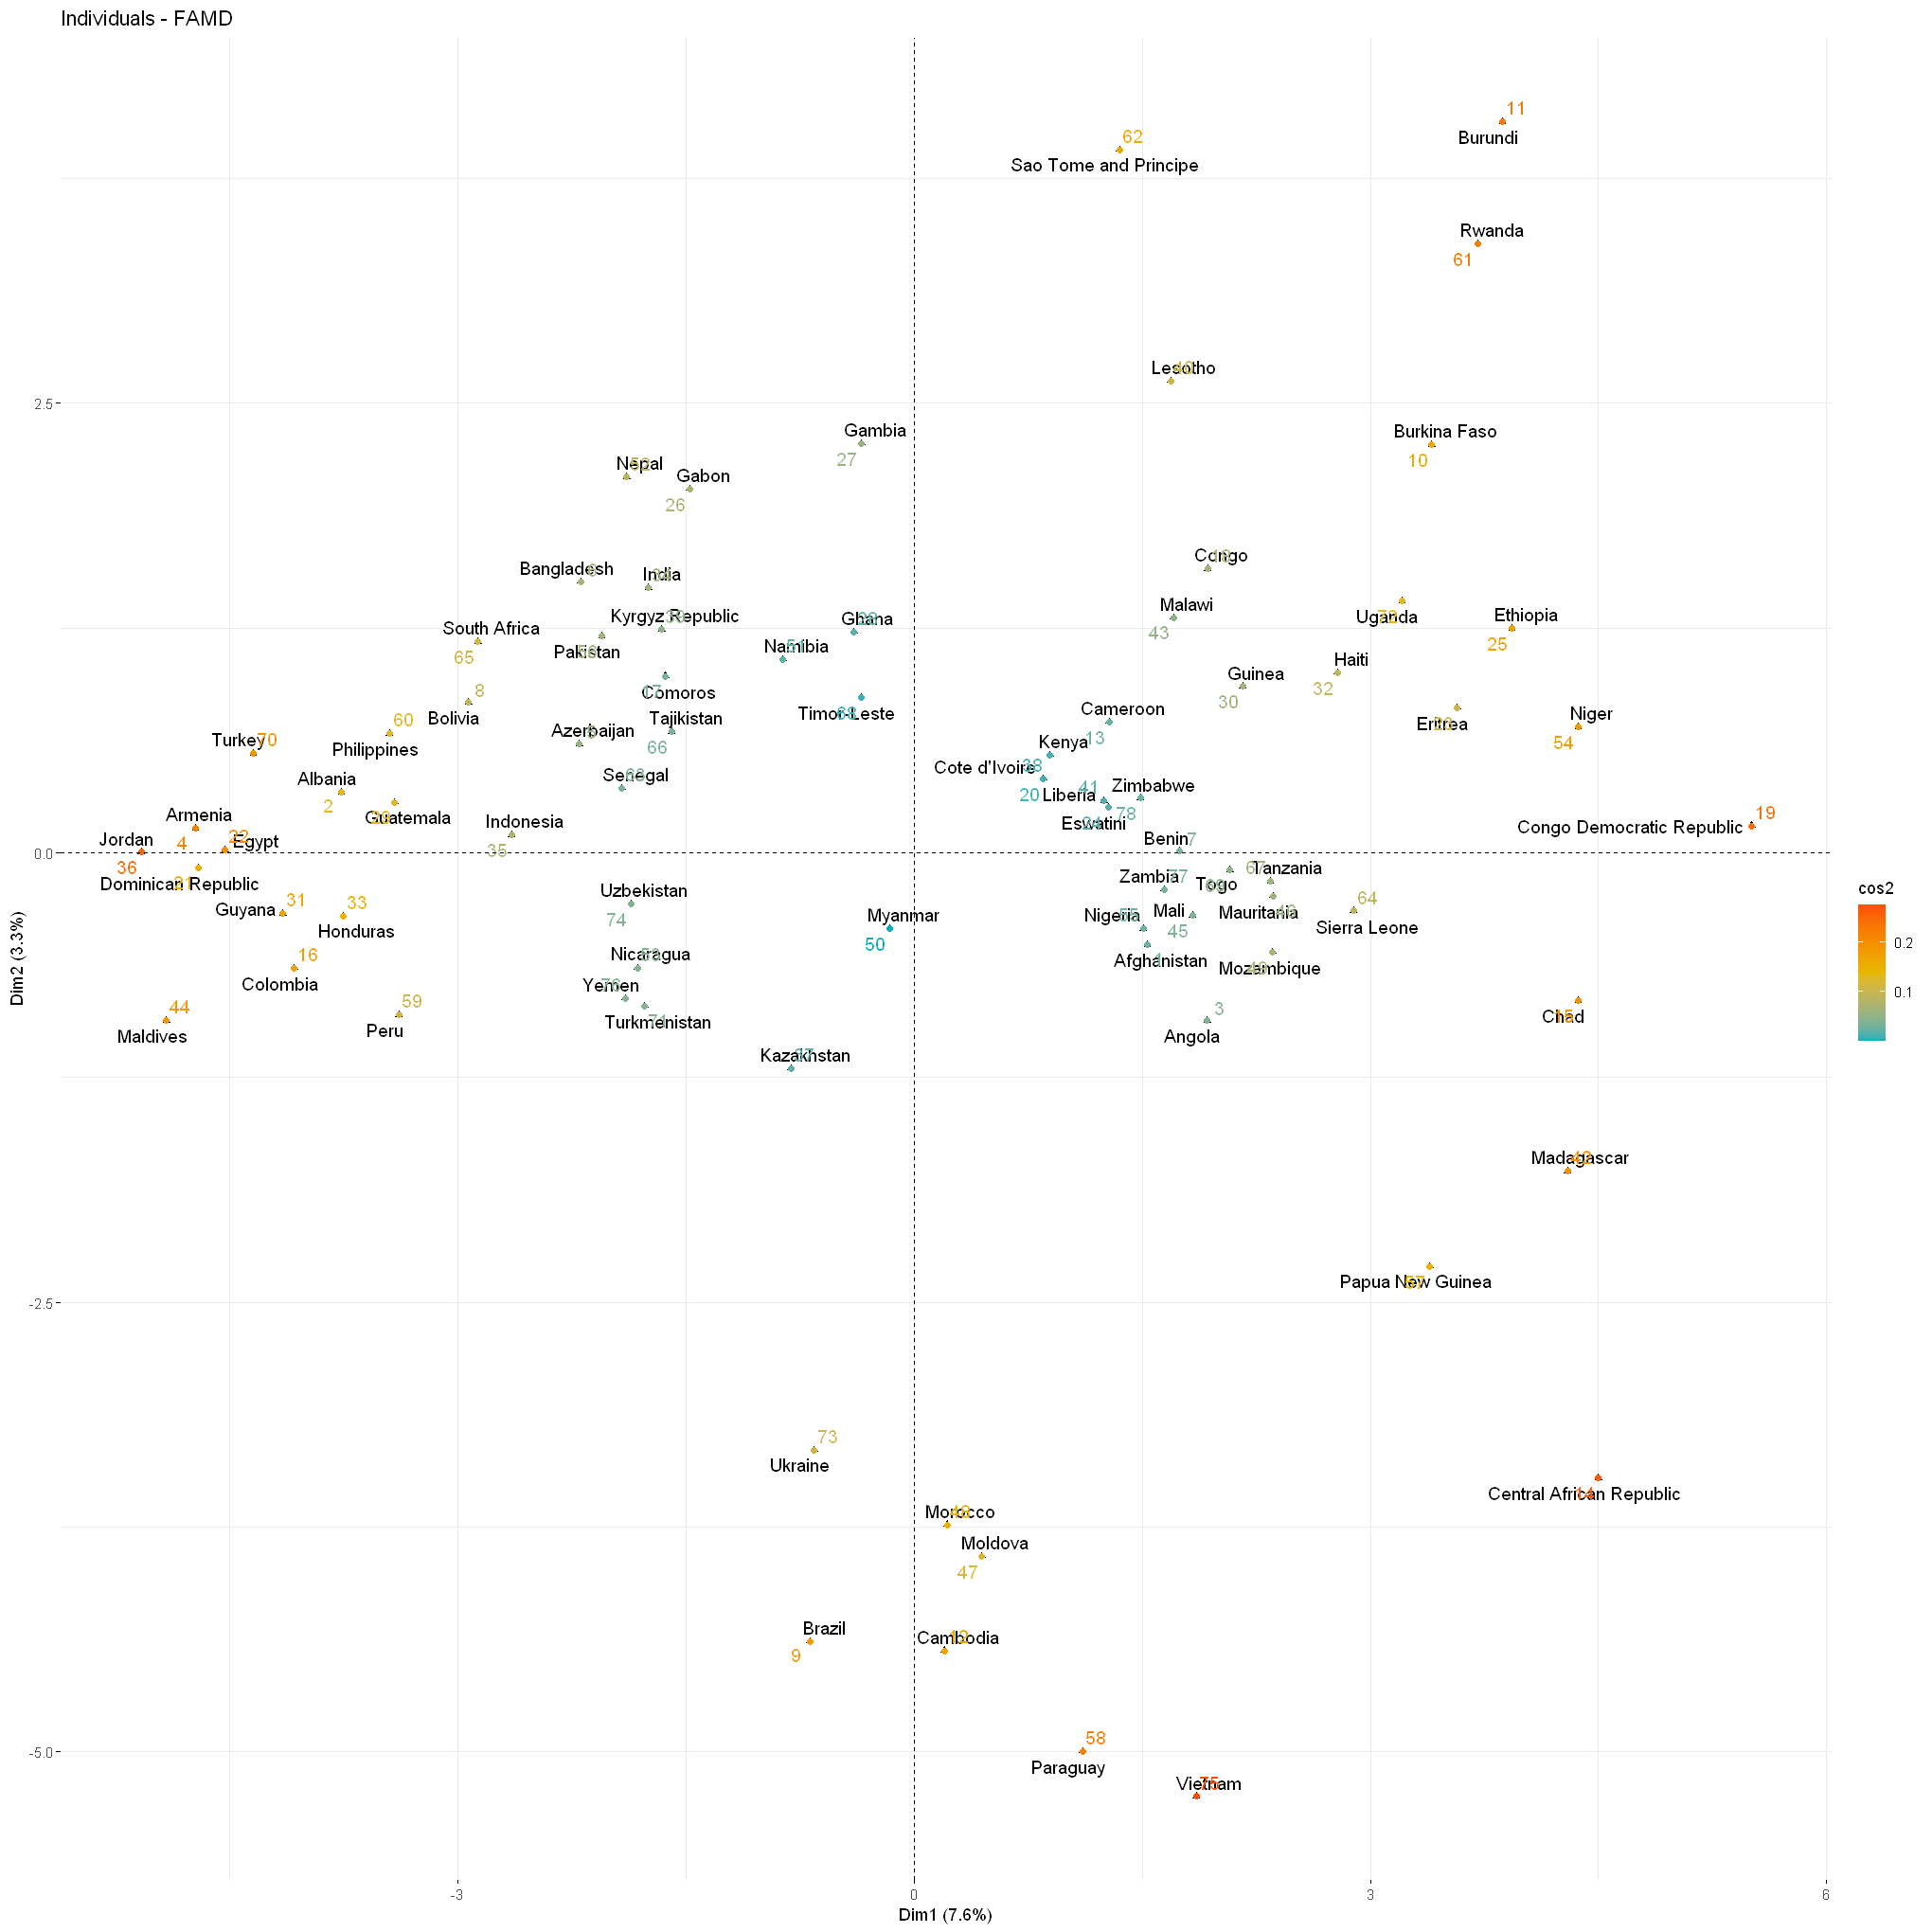

In [214]:
fviz_famd_ind(res.famd, col.ind = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

The factor analysis of mixed data (FAMD) makes it possible to analyze a data set, in which individuals are described by both qualitative and quantitative variables.

In [215]:
result <- PCA(df.wa[,(2:23)])
result

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 78 individuals, described by 22 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o